# Modeling the Joint Distribution of Wind Speed and Direction  using Gaussain Mixture Models

OEN Method: Harris, Cook
The parent wind speed distribution: Why Weibull?
http://www.sciencedirect.com/science/article/pii/S0167610514001056

Gaussian Mixture Models, 
http://scikit-learn.org/stable/modules/mixture.html

# 1. Set up

## 1.1 Environment

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from import_file import *
from helpers.parallel_helper import *
load_libs()

plt.rcParams['axes.autolimit_mode'] = 'round_numbers'
plt.rcParams['axes.xmargin'] = 0.
plt.rcParams['axes.ymargin'] = 0.
mpl.rcParams['patch.force_edgecolor'] = True

## 1.2 Read Data

In [2]:
# file_path= './data/NCDC/jerez/dat.txt' # time shift
# file_path= './data/NCDC/almeria/dat.txt'

# Greece
# file_path= './data/NCDC/eleftherios_intl/dat.txt'
# file_path= './data/NCDC/elefsis/dat.txt' # bad dataset
# file_path= './data/NCDC/malaga/dat.txt'
# file_path= './data/NCDC/gibraltar/dat.txt' # bad fit

# Turkey
# file_path= './data/NCDC/turkey/konya/dat.txt' 
# file_path= './data/NCDC/turkey/sivas/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/balikesir/dat.txt' # bad dataset
# file_path= './data/NCDC/turkey/bartin/dat.txt' # bad dataset

# Iran
# file_path= './data/NCDC/iran/chahbahar/dat.txt'
# file_path= './data/NCDC/iran/zabol/dat.txt' # Problematic data
# file_path= './data/NCDC/iran/torbat_heydarieh/dat.txt' # Unusable

# UAE
# file_path= './data/NCDC/al_maktoum/dat.txt' 
# file_path= './data/NCDC/abu_dhabi_intl/dat.txt' # Time shift
# file_path= './data/NCDC/bateen/dat.txt' # Time shift
# file_path= './data/NCDC/buraimi/dat.txt' # not good dataset

# file_path= './data/NCDC/uk/marham/dat.txt' 
# file_path= './data/NCDC/uk/tiree/dat.txt'  # try 4
# file_path= './data/NCDC/uk/boscombe_down/dat.txt' # 4?, numpy bug
# file_path= './data/NCDC/uk/middle_wallop/dat.txt' 
# file_path= './data/NCDC/uk/southhamption/dat.txt' # high 0, trend
# file_path= './data/NCDC/uk/bournemouth/dat.txt' # 4?
# file_path= "./data/NCDC/uk/weybourne/dat.txt"
# file_path= "./data/NCDC/uk/skye_lusa/dat.txt" # 
# file_path= "./data/NCDC/uk/wattisham/dat.txt"
# file_path= "./data/NCDC/uk/south_uist_range/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/holbeach/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/uk/cambridge/dat.txt" # inpropoer direction R square measure
# file_path= "./data/NCDC/us/baltimore/dat.txt" # time too short
# file_path= "./data/NCDC/uk/bealach_na_ba/dat.txt" # time too short
# file_path= "./data/NCDC/uk/benbecula/dat.txt" # truncate (untruncate in m/s), 4?

# file_path, NUMBER_OF_GAUSSIAN = "./data/NCDC/europe/landsberg_lech/dat.txt", 4 # very good, can try 4
# file_path= './data/NCDC/europe/pau_pyrenees/dat.txt' # unit shift, 2; force using knot 
# file_path= "./data/NCDC/europe/vatry/dat.txt"  # double peak, initial speed (should be good with m/s), mixed report type
# file_path= "./data/NCDC/europe/neuburg/dat.txt"
# file_path= "./data/NCDC/europe/valladolid/dat.txt"
# file_path= "./data/NCDC/europe/laupheim/dat.txt" # double peak, 4; very good, trend
# file_path= "./data/NCDC/europe/avord/dat.txt" # try 4, initial speed (should be good with m/s)
# file_path= './data/NCDC/europe/ciampino/dat.txt' # try 4, bandwidth?
# file_path= "./data/NCDC/europe/holzdorf/dat.txt" # 2008 year
# file_path= "./data/NCDC/europe/huspel_aws/dat.txt"  # integer, 4?
# file_path= "./data/NCDC/europe/barayas/dat.txt" # numpy problem
# file_path= './data/NCDC/europe/tenerife_sur/dat.txt'  # some directions are blocked
# file_path= './data/NCDC/europe/nantes/dat.txt' # some dir R square / K-S differs big, unit detect fails

file_path= "./data/NCDC/cn/shanghai/hongqiao_intl/dat.txt" # care for the sampling time
# file_path= "./data/NCDC/cn/shanghai/pudong/dat.txt"
# file_path= "./data/NCDC/cn/hefei_luogang/dat.txt" # few 0, trend, try 2
# file_path= "./data/NCDC/cn/nanjing_lukou/dat.txt" 
# file_path= "./data/NCDC/cn/zhengzhou_xinzheng/dat.txt" 
# file_path= "./data/NCDC/cn/tianjin/binhai/dat.txt" # few 0, trend, stationary speed, unstationary direction
# file_path= "./data/NCDC/cn/tianjin/tianjing/dat.txt" # 16 sectors
# file_path= "./data/NCDC/cn/shijiazhuang_zhengding/dat.txt" 
# file_path= "./data/NCDC/cn/henan_gushi/dat.txt" # 16 sectors, fit not very good
# file_path= "./data/NCDC/cn/nanning_wuxu/dat.txt" # numpy priblem, unstationary speed
# file_path= './data/NCDC/cn/macau/dat.txt'  
# file_path= "./data/NCDC/cn/hk_intl/dat.txt" # few 0

# file_path= './data/NCDC/southeast_asia/malaysia/mersing/dat.txt' # 2 mode, paper comparison
# file_path= './data/NCDC/southeast_asia/malaysia/penang/dat.txt'
# file_path= './data/NCDC/southeast_asia/malaysia/butterworth/dat.txt' # 2 mode 
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_mahmud/dat.txt" # stable
# file_path= "./data/NCDC/southeast_asia/malaysia/bsultan_ismail/dat.txt" # 
# file_path= "./data/NCDC/southeast_asia/singapore/changi/dat.txt" # trend, no 0, questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/paya_lebar/dat.txt" # questionary data
# file_path= "./data/NCDC/southeast_asia/singapore/seletar/dat.txt"
# file_path= "./data/NCDC/east_asia/cheongju_intl/dat.txt" # 2005-2009  may have problem, fit is good; numpy problem
# file_path= "./data/NCDC/east_asia/daegu_ab/dat.txt" # recent 5 year may have problem, but fit is generally good; numpy problem

# file_path= "./data/NCDC/oceania/auckland_intl/dat.txt"  # Good data, Weird KDE shape, might be blocked?
# file_path= "./data/NCDC/oceania/brisbane_archerfield/dat.txt" # high 0, few data 
# file_path= "./data/NCDC/oceania/narrandera/dat.txt" # high 0, few data
# file_path= "./data/NCDC/oceania/canberra/dat.txt" # high 0, numpy problem

# file_path= './data/NCDC/us/boston_16nm/dat.txt' # Offshore

# file_path = './data/asos/denver/hr_avg.csv'
# file_path = './data/asos/bismarck_ND/hr_avg.csv' # try 4
# file_path = './data/asos/aberdeen_SD/hr_avg.csv' # only to 2012, good fit, try 2
# file_path = './data/asos/minneapolis/hr_avg.csv'
# file_path = './data/asos/lincoln_NE/hr_avg.csv' 
# file_path = './data/asos/des_moines_IA/hr_avg.csv'
# file_path = './data/asos/springfield_IL/hr_avg.csv' # good fit
# file_path = './data/asos/topeka/hr_avg.csv' # High 0

# file_path = './data/NDAWN/baker/hr_avg.csv' # 4 might be better
# file_path = './data/NDAWN/dickinson/hr_avg.csv'
# file_path = './data/NDAWN/rugby/hr_avg.csv'
# file_path = './data/NDAWN/bowman/hr_avg.csv'
# file_path = './data/NDAWN/grand_forks/hr_avg.csv'
# file_path = './data/NDAWN/williston/hr_avg.csv'
# file_path = './data/NDAWN/jamestown/hr_avg.csv'

In [3]:
if "cn_database" in file_path: 
    df = read_cn_database(file_path)
elif 'NCDC' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df.rename(columns={'Date':'date','Dir':'dir','Spd':'speed','Type':'type','I.1':'wind_type'}, inplace=True)
    df = df[['date','HrMn','type','dir','speed','wind_type' ]]
    df.dropna(subset=['dir','speed'], inplace=True)
    integer_data = True
elif 'NDAWN' in file_path:
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = False
else:
    # ASOS
    df = pd.read_csv(file_path, header=0, skipinitialspace=True, dtype={'HrMn':'object'})
    df['type']='default'
    df['wind_type']='default'
    df = df.dropna()
    integer_data = False
    knot_unit = True

In [4]:
df

date  HrMn   type  dir  speed wind_type
0       19560820  0000  FM-12  200    5.1         N
1       19560820  0300  FM-12  250    4.1         N
2       19560820  0600  FM-12  250    5.1         N
3       19560820  0900  FM-12  270    6.2         N
4       19560820  1200  FM-12  270    5.1         N
5       19560820  1800  FM-12  290    3.1         N
6       19560820  2100  FM-12  320    3.1         N
7       19560821  0000  FM-12  320    3.1         N
8       19560821  0300  FM-12  290    4.1         N
9       19560821  0600  FM-12  270    5.1         N
10      19560821  0900  FM-12  320    2.1         N
11      19560821  1200  FM-12   90    1.0         N
12      19560821  1800  FM-12  140    2.1         N
13      19560821  2100  FM-12  140    2.1         N
14      19560822  0300  FM-12  140    6.2         N
15      19560822  0600  FM-12  160    4.1         N
16      19560822  1200  FM-12  140    4.1         N
17      19560822  1800  FM-12  200    3.1         N
18      19560822  2100  FM-12  290    7.2         N
19      19560823  0300  FM-12  270    7.2         N
20      19560823  0900  FM-12  320    5.1         N
21      19560823  1200  FM-12  270    1.0         N
22      19560823  2100  FM-12  999    0.0         C
23      19560824  0000  FM-12  999    0.0         C
24      19560824  0300  FM-12  270    1.0         N
25      19560824  0600  FM-12   90    1.0         N
26      19560824  0900  FM-12  160    2.1         N
27      19560824  1200  FM-12  999    0.0         C
28      19560824  1800  FM-12  999    0.0         C
29      19560824  2100  FM-12  140    4.1         N
...          ...   ...    ...  ...    ...       ...
359333  20150301  0900  FM-15  270    4.0         N
359334  20150301  0930  FM-15  260    4.0         V
359335  20150301  1000  FM-15  250    4.0         V
359336  20150301  1030  FM-15  250    3.0         V
359337  20150301  1100  FM-15  260    4.0         N
359338  20150301  1130  FM-15  230    3.0         N
359339  20150301  1200  FM-15  230    2.0         V
359340  20150301  1230  FM-15  270    3.0         N
359341  20150301  1300  FM-15  240    2.0         V
359342  20150301  1330  FM-15  260    2.0         V
359343  20150301  1400  FM-15  250    2.0         V
359344  20150301  1430  FM-15  240    2.0         V
359345  20150301  1500  FM-15  999    0.0         C
359346  20150301  1530  FM-15  999    1.0         V
359347  20150301  1600  FM-15  999    1.0         V
359348  20150301  1630  FM-15  210    1.0         N
359349  20150301  1700  FM-15  999    1.0         V
359350  20150301  1730  FM-15  999    1.0         V
359351  20150301  1800  FM-15  999    1.0         V
359352  20150301  1830  FM-15  180    1.0         N
359353  20150301  1900  FM-15  160    1.0         N
359354  20150301  1930  FM-15  210    1.0         N
359355  20150301  2000  FM-15  230    2.0         N
359356  20150301  2030  FM-15  230    1.0         N
359357  20150301  2100  FM-15  240    2.0         N
359358  20150301  2130  FM-15  180    1.0         N
359359  20150301  2200  FM-15  160    1.0         N
359360  20150301  2230  FM-15  150    1.0         N
359361  20150301  2300  FM-15  190    2.0         N
359362  20150301  2330  FM-15  190    1.0         N

[359363 rows x 6 columns]

In [5]:
df['time']=pd.to_datetime(df["date"].astype(str).map(str) + df["HrMn"], format='%Y%m%d%H%M')
df.set_index(['time'], inplace=True)
df['HrMn']=df['HrMn'].astype(int)
df = df.query("(dir <= 999) & (speed < 100) & \
              (date >= 19700000) & (date < 20170000) ")

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


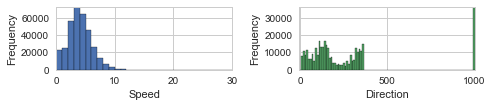

In [6]:
plot_speed_and_angle_distribution(df.speed, df.dir)

In [7]:
# Dir [10,360]=> [0,350]
df['dir'] = df['dir'].apply(lambda x: x%360 if x < 999 else x) 
df['month'] = df['date']%10000//100
# Convert Windrose coordianates to Polar Cooridinates 
df['dir_windrose'] = df['dir']
df['dir'] = df['dir'].apply(lambda x: (90 - x)%360 if x < 999 else x)
df.describe()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

date           HrMn            dir          speed  \
count  3.369710e+05  336971.000000  336971.000000  336971.000000   
mean   2.000006e+07    1128.070137     268.228497       3.543890   
std    1.115119e+05     691.735348     275.924866       2.002307   
min    1.973010e+07       0.000000       0.000000       0.000000   
25%    1.991120e+07     530.000000      90.000000       2.000000   
50%    2.002062e+07    1100.000000     200.000000       3.000000   
75%    2.010050e+07    1730.000000     320.000000       5.000000   
max    2.015030e+07    2357.000000     999.000000      30.000000   

               month   dir_windrose  
count  336971.000000  336971.000000  
mean        6.536892     248.807883  
std         3.448796     279.529540  
min         1.000000       0.000000  
25%         4.000000      90.000000  
50%         7.000000     150.000000  
75%        10.000000     310.000000  
max        12.000000     999.000000

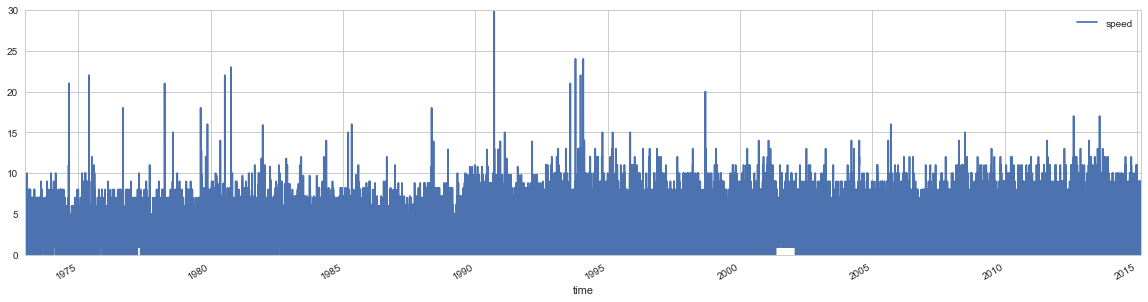

In [8]:
df.plot(y='speed',legend=True,figsize=(20,5))

### 1.2.1 Unit Detection

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


False


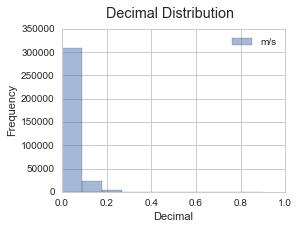

In [9]:
df['decimal'] = df.speed % 1
df.decimal.hist(alpha=0.5, label='m/s', figsize=(4, 3))
if 'knot_unit' not in globals():
    knot_unit = True if len(df.query('decimal >= 0.2')) / len(df) > 0.3 else False
    if knot_unit:
        df['speed'] = df['speed'] * 1.943845
        df['decimal'] = df.speed % 1
        df.decimal.hist(alpha=0.5, label='knot')
        # need more elaboration, some is not near an integer
        df['speed'] = df['speed'].apply(lambda x: int(round(x)))
    plt_configure(xlabel='Decimal', ylabel='Frequency', legend={'loc': 'best'}, title='Decimal Distribution')
    
df.drop(['decimal'], 1,inplace=True)
print(knot_unit)

In [10]:
dir_unit_text = ' (degree)'
if knot_unit == True:
    speed_unit_text = ' (knot)'
else: 
    speed_unit_text = ' (m/s)'

### 1.2.2 Sampling Type Selection

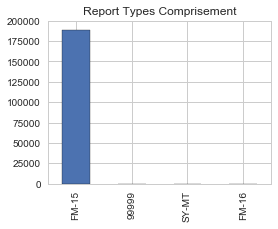

In [11]:
sample_type = df.query('date > 20000000')['type']
sample_type.value_counts().plot(
    kind = 'bar', title = 'Report Types Comprisement', figsize=(4,3))

report_type_most_used = sample_type.value_counts().argmax()
df = df.query("type==@report_type_most_used")

### 1.2.3 Sampling Time Selection

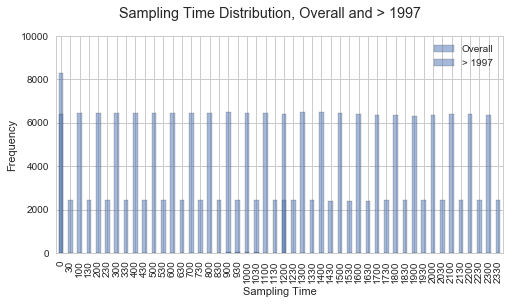

In [12]:
MID_YEAR = (min(df.date)//10000+max(df.date)//10000)//2

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5,label='Overall')
df.query('date > @MID_YEAR * 10000')['HrMn'].value_counts().sort_index().plot(
    kind='bar', alpha=0.5, label='> %s' %  MID_YEAR )

plt_configure(xlabel='Sampling Time', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 4), 
              title = 'Sampling Time Distribution, Overall and > %s ' %  MID_YEAR)

[0, 30]


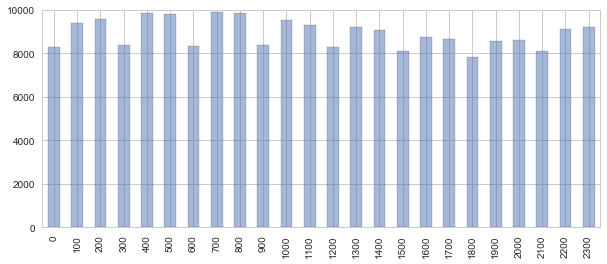

In [13]:
df['sample_time'] = df.HrMn % 100 
sample_time = df.query('date > 20000000')['sample_time']
sample_times = sample_time.value_counts()[sample_time.value_counts() > 2000]
sample_times = sample_times.index.tolist()
# df = df.query("sample_time in @sample_times")
df = df.query("sample_time == @sample_times[0]")
df.drop(['sample_time'], 1,inplace=True)
print(sample_times)

df['HrMn'].value_counts().sort_index().plot(kind='bar', alpha=0.5, figsize=(10, 4))

## 1.3 Data Wrangling

### 1.3.1 Artefacts

#### 1.3.1.1 wrong direction record

In [14]:
if integer_data:
    display(df.query("(dir % 10 >= 0.1) & (dir != 999)"))
    df = df.query('(dir % 10 <= 0.1) | (dir == 999)')

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1994-01-28 00:00:00  19940128     0  FM-15  119    3.0         N      1   
1994-07-18 10:00:00  19940718  1000  FM-15  337    5.0         N      7   
1994-08-05 11:00:00  19940805  1100  FM-15  335    9.0         N      8   
1994-08-10 05:00:00  19940810   500  FM-15  319   10.0         N      8   
1994-09-03 21:00:00  19940903  2100  FM-15  331    5.0         N      9   
1994-12-03 14:00:00  19941203  1400  FM-15  316    3.0         N     12   
1995-04-03 13:00:00  19950403  1300  FM-15  337    3.0         N      4   
1998-06-03 11:00:00  19980603  1100  FM-15   59   10.0         N      6   
1998-09-09 12:00:00  19980909  1200  FM-15  359   20.0         N      9   

                     dir_windrose  
time                               
1994-01-28 00:00:00           331  
1994-07-18 10:00:00           113  
1994-08-05 11:00:00           115  
1994-08-10 05:00:00           131  
1994-09-03 21:00:00           119  
1994-12-03 14:00:00           134  
1995-04-03 13:00:00           113  
1998-06-03 11:00:00            31  
1998-09-09 12:00:00            91

#### 1.3.1.2 sudden increase in speed

date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
1993-12-21 22:00:00  19931221  2200  FM-15  110   22.0         N     12   
1993-08-02 14:00:00  19930802  1400  FM-15  140   21.0         N      8   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N     11   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N      8   
2008-07-02 08:00:00  20080702   800  FM-15  170   15.0         N      7   

                     dir_windrose  incre  incre_reverse  
time                                                     
1993-12-21 22:00:00           340   19.0           20.0  
1993-08-02 14:00:00           310   17.0           21.0  
1985-04-30 08:00:00           140    9.8            9.8  
2005-09-11 17:00:00            90    4.0            4.0  
1981-12-19 07:00:00           310   13.9            3.1  
1994-10-20 08:00:00           310    6.0            8.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
2012-08-08 04:00:00            90    2.0            0.0  
2008-07-02 08:00:00           280   10.0           13.0

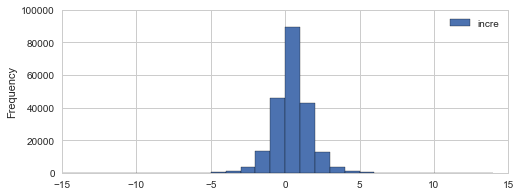

In [15]:
# sudden increse
df['incre'] = df.speed.diff(1)
df['incre'].fillna(0, inplace=True)
df['incre_reverse'] = df.speed.diff(-1)
df['incre_reverse'].fillna(0, inplace=True)

display(df.sort_values(by='speed',ascending=False).head(10))
df['incre'].plot(kind='hist', bins=arange(-15, 15), legend=True, figsize=(8, 3))

In [16]:
incre_threshold = 20 if knot_unit else 10
print('sudden increase number', len(df.query('(incre > @incre_threshold )&(incre_reverse > @incre_threshold )')))
df = df.query('(incre < @incre_threshold )|(incre_reverse < @incre_threshold )')

# Check the max speed
display(df.sort_values(by='speed',ascending=False).head(10))
df.drop(['incre', 'incre_reverse'], 1, inplace=True)

sudden increase number 2


date  HrMn   type  dir  speed wind_type  month  \
time                                                                      
2005-09-11 17:00:00  20050911  1700  FM-15    0   16.0         N      9   
1985-04-30 08:00:00  19850430   800  FM-15  310   16.0         N      4   
1981-12-19 07:00:00  19811219   700  FM-15  140   15.9         N     12   
2012-08-08 04:00:00  20120808   400  FM-15    0   15.0         N      8   
2012-08-08 05:00:00  20120808   500  FM-15   10   15.0         N      8   
1995-11-07 04:00:00  19951107   400  FM-15  110   15.0         N     11   
1995-03-09 15:00:00  19950309  1500  FM-15  110   15.0         N      3   
1994-10-20 08:00:00  19941020   800  FM-15  140   15.0         N     10   
2013-03-09 17:00:00  20130309  1700  FM-15   80   14.0         N      3   
2005-08-06 03:00:00  20050806   300  FM-15  350   14.0         N      8   

                     dir_windrose  incre  incre_reverse  
time                                                     
2005-09-11 17:00:00            90    4.0            4.0  
1985-04-30 08:00:00           140    9.8            9.8  
1981-12-19 07:00:00           310   13.9            3.1  
2012-08-08 04:00:00            90    2.0            0.0  
2012-08-08 05:00:00            80    0.0            2.0  
1995-11-07 04:00:00           340    5.0            2.0  
1995-03-09 15:00:00           340    4.0            3.0  
1994-10-20 08:00:00           310    6.0            8.0  
2013-03-09 17:00:00            10    8.0            2.0  
2005-08-06 03:00:00           100    4.0            1.0

### 1.3.2 0 Speed

In [17]:
with_too_many_zero, null_wind_frequency = is_with_too_many_zero(df.query("(date >= 20050000)"))
delete_zero = with_too_many_zero
if delete_zero:
    df = df.query('(speed > 0)')
print(delete_zero, null_wind_frequency)

False 0.0412621359223


### 1.3.3 Direction re-aligment and 999
For some dataset, the 16 sectors are not record properly,

e.g. the sectors are [0,20,30,50], need to redistribute the angle into 22.5

In [18]:
display(df['dir'].value_counts().sort_index())
effective_column = df.query('dir < 999')['dir'].value_counts()[df['dir'].value_counts() > 30].sort_index()
if integer_data:
    SECTOR_LENGTH = 360/len(effective_column) 
else: 
    SECTOR_LENGTH = 10
print(len(effective_column), SECTOR_LENGTH)

0       5114
10      3736
20      3931
30      4370
40      4484
50      6036
60      6681
70      5524
80      5811
90      8968
100     8340
110     7085
120     7931
130     6770
140     4428
150     3796
160     3319
170     2573
180     2191
190     1555
200     1578
210     1991
220     1885
230     1882
240     2132
250     2360
260     3096
270     4399
280     4881
290     7184
300    11033
310     9313
320     9832
330    10032
340     7915
350     6258
999    25824
Name: dir, dtype: int64

36 10.0


In [19]:
df.query('dir == 999')['speed'].value_counts()

0.0    15499
2.0     5486
1.0     4531
3.0      229
4.0       43
5.0       15
3.1        8
4.1        4
2.1        3
7.0        2
5.1        2
6.0        2
Name: speed, dtype: int64

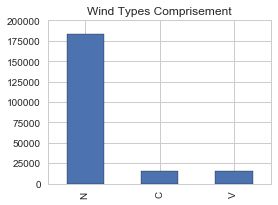

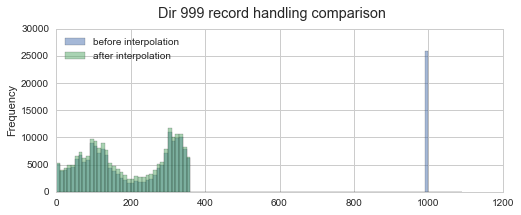

In [20]:
df=realign_direction(df, effective_column)
df=fill_direction_999(df, SECTOR_LENGTH)

## 1.4 Time Shift Comparison

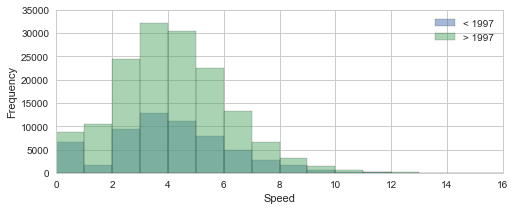

In [21]:
DIR_REDISTRIBUTE = 'even'
if DIR_REDISTRIBUTE == 'even':
    DIR_BIN = arange(-5, 360, 10) 
elif DIR_REDISTRIBUTE == 'round_up':
    DIR_BIN = arange(0, 360+10, 10) 

# Comparison between mid_year, looking for: 
# 1. Odd Even Bias
# 2. Time Shift of Wind Speed Distribution
bins = arange(0, df.speed.max() + 1)
df.query('date < @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['speed'].plot(
    kind='hist', alpha=0.5,bins=bins, label='> %s' % MID_YEAR)

plt.suptitle('Speed Comparison between year < %s, > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Speed', ylabel='Frequency', legend=True, figsize=(8, 3))

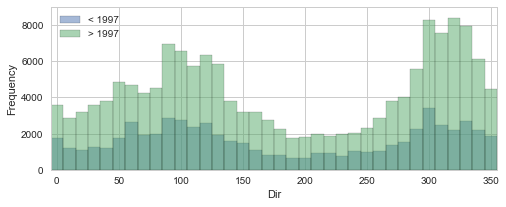

In [22]:
df.query('date < @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='< %s' % MID_YEAR)

df.query('date > @MID_YEAR * 10000')['dir'].plot(
    kind='hist', alpha=0.5,bins=DIR_BIN, label='> %s' % MID_YEAR)

plt.suptitle('Dir Comparison between year < %s, and > %s ' % (MID_YEAR, MID_YEAR), fontsize = 14)
plt_configure(xlabel='Dir', ylabel='Frequency', legend={'loc':'best'}, figsize=(8, 3), tight='x')

1979 - 1979


D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\__init__.py:938: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


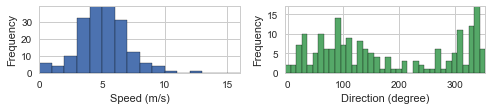

1980 - 1984


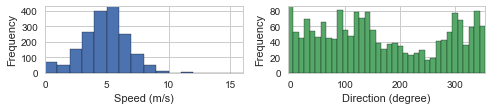

1985 - 1989


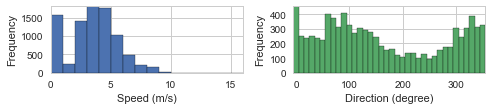

1990 - 1994


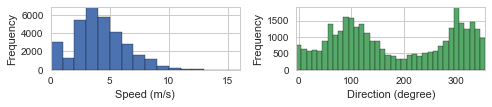

1995 - 1999


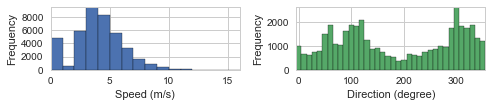

2000 - 2004


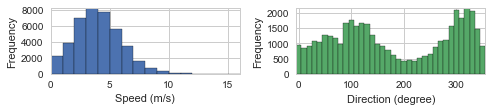

2005 - 2009


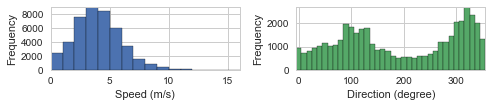

2010 - 2014


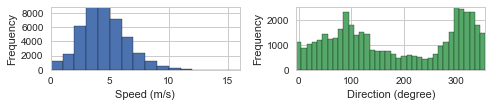

2015 - 2015


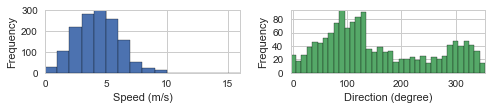

In [23]:
# Inspect the time shift of speed and degree distribution, and odd-even bias
check_time_shift(df, speed_unit_text=speed_unit_text, dir_unit_text=dir_unit_text)

(0, 6.0)

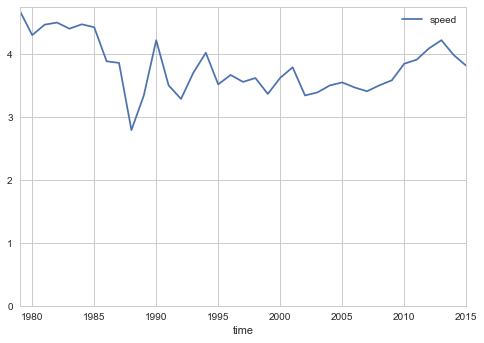

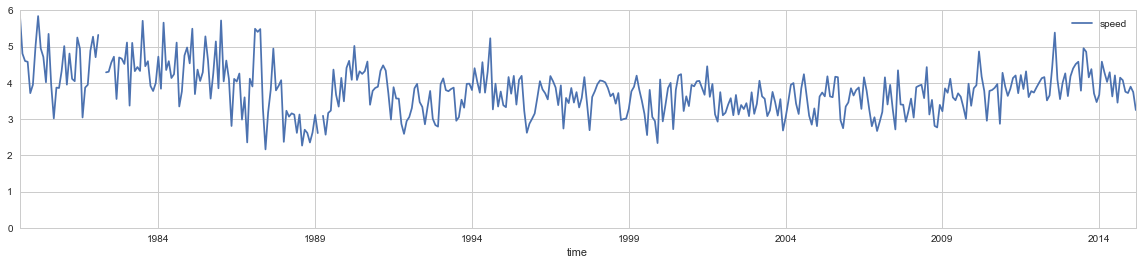

In [24]:
df.resample('A').mean().plot(y='speed')
plt.gca().set_ylim(bottom=0)
df.resample('M').mean().plot(y='speed', figsize=(20,4))
plt.gca().set_ylim(bottom=0)

In [25]:
display(df[df['dir'].isnull()])
df.dropna(subset=['dir'], inplace=True)

Empty DataFrame
Columns: [date, HrMn, type, dir, speed, wind_type, month, dir_windrose]
Index: []

In [26]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    den, _ = np.histogram(df[column], bins=bins, density=True)
    y_top=max(den)*1.2
    for year in arange(1980, 2016):
        end_year = year
        sub_df = df[str(year):str(end_year)]
        if len(sub_df) > 5000:
            plt.figure()
            df[column].hist(bins=bins, alpha=0.3, normed=True)
            sub_df[column].hist(bins=bins, alpha=0.5, figsize=(3,1.5), normed=True)
            plt.gca().set_ylim(top=y_top)
            plt_configure(title=str(year))
    align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAANAAAAB6CAYAAADOI938AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAADRJJREFUeJzt3W1sFNUaB/D/dre7bXdpK7RcFGhtKxUBCdZeayJiJGlQ
IkWDSrGxJkCCJopGKyoGqLCxjfLB2FQSk37QSoKkmpuA16DEGogvCE2rtKWQIHbplhbovr+/zLkf
elkp7sxsO92Z2e3zS0jonsnsk4V/d3b2nPNoGGMMhJApyVC6AEJSGQWIEAkoQIRIQAEiRAIKECES
UIAIkYACpAKMMWzduhVffPFF7DGHw4GGhgZUVVVh5cqV+Pjjj8FxXMLjQucm04cCpLBoNIrGxkac
PHlywuOvvPIKBgYGcODAAbS2tuL777/H/v37Ex4XOjeZRowoxmKxsNraWvboo4+yyspK1t7ezhhj
rLe3l5WXl7O+vr7Ysd3d3Wzp0qXM6/WKjgudm0wvegdSUHd3N0pLS/H1119j1qxZscctFguysrKw
ZMmS2GOLFy9GOBxGb2+v6LjQucn00ildwExWU1ODmpqafzxeWFiIQCAAm82G2bNnAwCsVisAwGaz
iY4LnZtML3oHUqHly5ejuLgYe/bsgdPphN1uR3NzM3Q6HcLhsOg4kQ8FSIX0ej1aWlrw559/oqqq
CqtXr8aDDz6IvLw8mEwm0XEiH7qEU6m7774b33zzDcbGxmAymRCNRvHBBx9g4cKFCY0TedA7kAo5
nU4899xzsFqtmDNnDgwGAzo7O1FYWIiysjLRcSIfCpAK5eXlIRgMoqmpCX/99RdOnjyJvXv34uWX
X4ZGoxEdJ/KR/RKuq6tL7qdMCcFgEBaLJfb6bN26FW1tbaipqUFubi6efPJJLFq0KOFxoXMTYfff
f3/Cx2oYk3dFaldX16QKVArVOb3StU66hCNEAgoQIRJQgAiRgAJEiAQUIEIkoAARIgEFiBAJKECE
SJB2k0k5joPdbhc97rbbbkNGBv3+INKkXYDsdjsOnvoKxlz+af1elwd1VRswZ84cGSsj6SjtAgQA
xlwTZuXnKl0GmQHSLkCMMYRDYYRDId5jwqEwZJ4CSNKUaIA4jkNjYyPOnz8PvV4Ps9mM4uLi2PjR
o0fx2WefQavVory8HI2NjYp+tvD5fLCOOpEb5q/BZXPC5/PJWBVJV6L/048fP45QKIQvv/wSb7zx
Bpqbm2NjgUAAH330ET7//HMcOnQIHo8HnZ2dSS04EVqdDrrMTN4/Wl3avfEShYgGqKurCw8//DAA
YMWKFbFtk4DxtfuHDh1CdnY2ACASicBgMCSpVELUR/RXscfjmbBRhVarRSQSgU6nQ0ZGBgoKCgAA
7e3t8Pl8eOihh0SfNJkLu0ZGRuBwOhAVWJjpdjpw9uxZXLt2TfBcqbIAjepUjmiATCYTvF5v7GeO
46C76RKI4zh8+OGHuHTpElpaWhJaUpzMhVUWiwWnfYPI+/9+afFkMKCsrExwA45z586hsrIyGSVO
q3RdqKaUyYZcNEAVFRXo7OzE2rVr0dPTg/Ly8gnju3fvhl6vxyeffJIyX0xGIxGc6bdi1K2POx4I
+GDUBGSuiqQi0QBVV1fjp59+Qm1tLRhjeP/993HkyBH4fD4sW7YMHR0dqKysxAsvvAAAqK+vR3V1
ddILl8pgyEZ2Tg7/AUGHfMWQlCUaoIyMDOzdu3fCYzdvnTQwMDD9VRGSIlLjmosQlaIAESIBBYgQ
CVLuK3mx5Qp2ux1i09wYx8HtcsLpsMUd9/v8yDf8s10iIbdKuQCJLVewXrqMEDIFz+H3+tET/g3D
WUNxx90OJ1bNvUdyrST9pVyAAOHlCjkmE/yeoOg5skw5MObF79wWiVCPHZIY+gxEiAQUIEIkSLlL
OLEFc5EoXX4R+aRcgMQWzI1cdUFvzJa5KjJTpVyAgL8XzMWToRO+A0fIdKLPQIRIQAEiRIKUvIRL
Nobx/R5uXkh4q5ycHOpHSihA8UQjEVy46kFB/2jc8UDAh5UVJTAajTJXRtSGAsRDn6kXXnBHCOgz
ECGSUIAIkYACRIgEFCBCJKCbCHEwjoPX4xZccMdxhTJXRdRIkQCNjY0Jjivd/Mrv9WOYG0LG1fjf
87gdTqywF2LWrPjricjMoUiA/nPuGO+YWppfGYzZtOCOiFIkQNT8iqQLuolAiASiAeI4Drt378bG
jRvx/PPPY3Bw8B/H+P1+1NbW4uLFi0kpkhC1ktRgCwDOnj2Luro6XL58OWlFEqJWop+BhBpsAUAo
FEJrayt27NiR8JNeGR7mHfO6POgJ9iA/Pz/uuFj/H5fLCZ0hEwZb/FvQiRxzY9zGM55ofyG5pErf
nVSpczIkNdgCptbr5/Y77uAdc+e4sOKeFbx34cT6/3htTugMOswW6A8kdozX5oQv6OMd1zLg3nvv
RVFREe9zyCWV+u6kSp2TIXoJJ9Zgi5CZTDRAFRUVOHHiBADEbbBFyEwmqcHWxo0b5ahRdTiOg9Vq
FT1u/vz50Gq1MlRElCK5wdYN7e3t01eVynmcbrSf+S/mDt3Of4zDie1r6lTxOYkkD32YmSJTbi7y
5vDfqCAzA81EIEQCRd6B+LblHR8Lg4k1+CFEJRQJ0PA1/u2iXDYnfD6fjNUQMnWKBIhvW15gfNte
QlIFfQYiRAIKECESqO56iWG8hQnftro+nw90i4GoheoCFI1EcKbfilG3Pu64ZfAyuGhU5qoIiU91
AQIAgyGbd1tdgyEbiMhcECE86DMQIRJQgAiRQHWXcIzj4HY5eTc1dLucYBnqv40gdjMEoB5D6UB1
AfJ7/egJ/4bhrKG448NXLTDNVv+2WGI3Q6jHUHpQXYAAIMuUw7upYZYxNXr2MI5DKBhCKBSIOx4M
BMFxnMxVkemmygClA7F3UpfNjuK5OixYsEDwPEpvc0yEUYCSSOid1GW34+jAccxz8y/KU8s2x4Qf
BUhBObOMtM1xiqMAKYQBCIcjtDYqxVGAFBKNRDEy5oYmi9ZGpTIKkIJ0Wh2tjUpxdHuHEAkoQIRI
QNcIKpbIdCC6yaAs0QBxHIfGxkacP38eer0eZrMZxcXFsfEffvgBra2t0Ol02LBhA5599tmkFjyT
iE0H8vu90AbtNN9OQaIBurk/UE9PD5qbm3HgwAEAQDgcRlNTEzo6OpCdnY1NmzZh9erVKCgoSHrh
M4HYdCCX04nhESf0+aNxx/1+LyoW/0t0vh2FbOok9Qe6ePEiioqKkJeXB2C81cnp06fx+OOPC57T
Ocbfu8frckFr0PEeI3U80XP4Q4GkP4fYOa5fGcWVyBAKfHPjjrscDhQG58PpsMcddzptODJkgcnE
/2VtKBzAv5cuRA7PAsbpMjIyAovFwjueqlsgS+oP5PF4JrR6NxqN8Hg8ok+6rrSKf1BobDrGU+U5
Ej1GwHyBHkl/y4HX6xW8DJwO8+bNE2xIppZmZZMlGiCh/kC3jnm93gmBiicVmiwRkihJ/YHKysow
ODgIh8OBUCiEM2fO4L777ktetYSojIaJ3Ae9cRfuwoULsf5A/f39sf5AN+7CMcawYcMG1NXVyVU7
IYoTDRAhhB/NRCBEAgoQIRJQgAiRQLa5cGJTgtTkqaeein33tWDBAjQ1NSlc0d9+//137N+/H+3t
7RgcHMTbb78NjUaDRYsWYc+eParZP+HmOvv7+7Ft2zbceeedAIBNmzZh7dq1itYXDoexc+dOWK1W
hEIhvPTSS7jrrrsm/3oymRw7doy99dZbjDHGuru72YsvvijXU09KIBBg69evV7qMuD799FP2xBNP
sGeeeYYxxti2bdvYr7/+yhhjbNeuXey7775TsryYW+s8fPgwa2trU7iqiTo6OpjZbGaMMWa329kj
jzwypddTtl9

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAN4AAAB6CAYAAADQ6u1PAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAFBlJREFUeJztnXtsFOW7x7/d3e6lu225FQSxnNMKCiqRi+AfKrFHxMMB
NBYpYGqMYCBGLkEJVCg0UATUHyYiIUI0ngCGEuSn4aAHEQjwg8OlBUTuAWRrC6Xtdva+3du8548t
093tttvL7M7s7vNJmnRn9p15Zna/+77zvs/7fdMYYwwEQcQVhdQBEEQqQsIjCAkg4RGEBJDwCEIC
SHgEIQEkPIKQABJegsEYw9y5c7Fz505hm9lsxscff4zx48fjhRdewFdffQWe5zu9v6NjE7GBhJdA
+P1+lJWV4cSJEyHbFyxYgOvXr2Pr1q3YsmULDh06hC+++KLT+zs6NhEjGJEQVFdXs5kzZ7KXX36Z
jR07lu3YsYMxxtjly5fZsGHD2JUrV4T3XrhwgT311FPM4XBE3d/RsYnYQTVegnDhwgXk5eVh3759
yMzMFLZXV1dDq9VixIgRwrYnn3wSXq8Xly9fjrq/o2MTsUMldQBE55g2bRqmTZvWZntOTg6am5vR
1NSEPn36AABqa2sBAE1NTVH3d3RsInZQjZfgjBw5EkOGDMHq1athsVjAcRw2bNgAlUoFr9cbdT8h
DSS8BEetVmPz5s24c+cOxo8fj4KCAjz//PPIzs6GwWCIup+QBmpqJgFPPPEEDhw4AJPJBIPBAL/f
j88++wyPPfZYp/YT8YdqvATHYrFg9uzZqK2tRd++faHRaHD06FHk5OQgPz8/6n5CGkh4CU52djbc
bjfWr1+Pu3fv4sSJE1izZg0+/PBDpKWlRd1PSIOsm5pVVVVShyBL3G43qqurhfszd+5cfPvtt5g2
bRqysrLwxhtvYOjQoZ3e39GxiY4ZM2ZMt8qlMSbfGehVVVXdvrB4QnGKSyrESU1NgpAAEh5BSEDU
Zzye51FWVoYbN25ArVajvLwcQ4YMEfYfOXIEW7ZsgUqlQmFhIWbMmNFuGZPJhJUrV8JqtQpd2rm5
uTG9QIKQI1GF9/vvv8Pj8aCiogIXL17Ehg0bsHXrVgCA1+vF+vXrsXfvXuh0OsyaNQsFBQU4f/58
xDKff/45pk6dismTJ+P06dO4c+cOCY9ISaI2NauqqvDiiy8CAJ599lkhsRYAbt++jdzcXGRnZ0Ot
VmPMmDE4d+5cu2XOnz+PBw8e4N1338X+/fsxbty4WFwTQcieqDWe3W4PSS1SKpXw+XxQqVSw2+0h
2ex6vR52u73dMrW1tcjKysL333+Pr7/+Gtu3b8eiRYs6PH+idGtTnOKSKHF2l6jCMxgMcDgcwmue
56FSqSLuczgcyMzMbLdMr169UFBQAAAoKCjAl19+GTXAZO9WjicUp7j05MchalNz9OjROH78OADg
4sWLGDZsmLAvPz8fRqMRZrMZHo8HlZWVGDVqVLtlxowZg2PHjgEAzp07h8cff7zbgRNEIhO1xps4
cSJOnjyJmTNngjGGTz/9FPv374fT6URRURGWL1+OOXPmgDGGwsJCDBgwIGIZAFi2bBlWrlyJ3bt3
w2Aw4B//+EfML5Ag5AhlrogAxSkuqRAnDaAThATIOklajvA8D47j2mwjxIExBpfLFdI5l5GRkXQz
KUh4XYTjOOw68yP0WYHhEofVjqc0NK9NLJxOJy7f4eDXPAAANDc78cLof4der5c4MnEh4XUDfZYB
mb2yAARqO0ujBSaTSdjfu3dvKBTUiu8uao0WuowMqcOIKSS8HuK0OXCz4Qa4a80AAjXg2+ML0bdv
X4kjI+QMCU8EdPoMoQYkiM5A7SGCkACq8YiEgjEGp9PZZhuAkJ5PufeEkvBEhud5waE5GOpwEQen
04l/nf8LWm1r54uZa0SaQons7N4AEqMnlIQnMk6bA/9s+BV9B/QTttnMVvzXE/8hWKgDJMSeoNVm
hPR6ulwZSFMoEqonNOWFF2lAvKei0GfpQzpb7BYb/nmpVYzU80mkvPAiDYjHQhThYiQ6B2OszdQz
GacXd5qUFx4QOiAeDcYYvB4vvB4PAMDr8SHxvwbypbnZhdOXzMLzm5lrhDbDgAwZP791BhJeF3E6
nah9YEGWN9AUrWuwQqvxSRxVcqPR6oTnN5er7XMcz/Nw2KxQtHRiupwu8HxOPEPsMiS8bqBUqaBK
T2/5XwmAhCcldpsVZx/8C708gccDm9mCZ7kcWS+yScLrIQyAz+cLaXoq1XRbuwvP87DbrLCYA0My
VosZmdm9opbTGfTQZweE5vPJf90/+ob0EL/PD7PLi3sNgQ6AugYrBmuUEkeVuHAch6uOC7DWB4TH
NTbiecUE9O3bL0rJxCJqnznP81i1ahWKiopQXFwMo9EYsv/IkSMoLCxEUVER9uzZ06ky+/fvR1FR
kYiXIS1KhRKq9HSo0tNbmp5hMAaPN9AhE/jzJkXPXKzQ6jOgz86EPjsTOkNid6K0R1wNbQHg6tWr
2Lt3b0p98bxeP+qtDviUgS+RtcnSJu2JSC3iamjLcRw2bdqETz75JBbXEhN4nofJZBL+OI5Dd34z
lApVUK1ILfxUJ26Gth6PBytWrEBJSQk0Gk2nA4y1sanZbMYDrg52px1AIL3rWP0xZGdnAwisuFpl
uQJ9ZqC2elBTB69aB77lJ8tqtUClSRfyMy1WK9KVbihUrb9pDY31sHkBVZM2cA6LGX/++ScaGhpi
em2RkLtRbF1dHQC03k+LGdWcEV5fwF7DYm6CQqGEydSaD1tbcxcWlRloaeZLeX87S9wMba9fvw6j
0YiysjK43W7cunUL69atw4oVKzo8f6zdpkwmE+5ee9A6gO5luNVcg76awMTWek8dBg0ehJyBAwAA
aqUGJrtbyLt0NFngdDuF126rHf1ysjBw0CDhHF6HF4qgMgo/j8GDB2Pw4MHCe+KRu5kI7l3V1dU4
dP8P4V4xrw+5WUMw5N/yAABNpkakKRTo3bs171WlAKwOrvX+soDna/Aa77GYrdCTH7Gowhs9ejSO
Hj2KyZMnd2hom5GRgcrKSsyZMwdpaWltyowcORIHDhwAANTU1GDJkiVRRScVwelddoutS2UZAK+3
dXgBAHz+0O5tl8OJ/7n+Ox6xDQRAuZti4/f5UHm1Fg9sagDynK0QV0PbVMDv86POZEOatrXGr6u3
Qq3XhbwvI5NyN4G28+vE6nTSaHSynq0QVXgKhQJr1qwJ2Zaf3+qqVVBQIKyH0FGZYAYPHiwMPSQj
KmVrZgsAKFTpIfvDa8VUHl4In19XbfwbvN8vcVSxh7rXJCC8Vkz14YXg+XUaTWjLgPE8bFZLlzNZ
5E7KCy/SbIN4pHwF14o0vNA+LocLF71ncU9bAwBoqq/H0/bRUClbO6JsVguYIrFaDCn/iUeabUAp
X/JCa8gQ8jCbGhpxsalViABwr74ahj6tz8vhtaQcZyukvPCASLMNCDkTLEQgkGIWTHgtKcfZCiQ8
IikJFqfX4wbHcSHDCVJ73pDwiKRHjuOmKSW8SJ6MTqezY+uGoJkFQNvBcCIxkNu4aUoJL5InY7Rx
o/CZBZEGw3sKa3E6e9gUerjsV3BTSOqmUazgeR4WMwePJ5CiZ7NaRB/TlOO4aUoJD2jryajR6EKc
G8I/JJ/fK8wsANoOhotBeFOovqYOynRVStgBchyHkzVHkdkrkJR+r74avMjfSjmOm6ac8KIR/iHF
ooaLRHBTyG6xQaVWyappJBbhPqYcxwkTX4FAD6XTLb4o5DZuKn0EMiT4Q4pFDZfKhPuY1v71NzxI
vXtMwiPiTrCPaYbBAJfdLXFE8YeER8SMSPb4JpMJHrcn5XuJZS+84Am1QM8mNIb3oAHyyPNr2+uW
HBaB4c1KINC

In [27]:
for column in ['speed', 'dir']:
    if column == 'speed':
        bins = arange(0, df[column].max()+1, 1)
    else:
        bins = arange(0, 361, 10)
    density_all, _ = np.histogram(df[column], bins=bins, density=True)
    df[column].hist(bins=bins, figsize=(5,3))

    R_squares = []
    years = []
    for year in arange(1980, 2016):
        start_year, end_year = year-1, year+1
        sub_df = df[str(start_year):str(end_year)]
        if len(sub_df) > 5000:
            density, _ = np.histogram(sub_df[column], bins=bins, density=True)
            y_mean = np.mean(density_all)
            SS_tot = np.sum(np.power(density_all - y_mean, 2))
            SS_res = np.sum(np.power(density_all - density, 2))

            R_square = 1 - SS_res / SS_tot
            R_squares.append(R_square)
            years.append(year)

    plt.figure()
    plot(years, R_squares)
    ylim = max(min(plt.gca().get_ylim()[0],0.85),0)
    plt.gca().set_ylim(bottom=ylim, top=1)
    plt_configure(figsize=(5,3))
    align_figures()

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAU4AAADECAYAAADwD8hjAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAF6NJREFUeJzt3X9M1Pfhx/HncQLq/dCyrEmzihGVRGMQOWaX9KS1WUeX
zNUZPbkzNMbqVuOP4go7f4CUWKukX1hLG9bWujQBgbHarL+WbKsxMMWR5hw2osyMObTaWsWm3lEB
PT7fPxpZmRb8wMGd7vX4S9+87+3rLfri7nOfz+cshmEYiIjIbYuLdgARkTuNilNExCQVp4iISSpO
ERGTVJwiIiapOEVETBp3O5N+9rOfYbfbAbj//vt56qmn2Lx5MxaLhZkzZ1JcXExcXBz19fXU1dUx
btw41q5dy8KFC+nu7qagoIDOzk5sNhulpaUkJSXR0tLCzp07sVqtuN1u1q9fP6obFRGJGGMI3d3d
xuOPPz5g7Be/+IXxt7/9zTAMwygqKjL+/Oc/G59//rnxk5/8xOjp6TGuXLnS/+vf/va3RkVFhWEY
hvH+++8bO3bsMAzDMH76058aHR0dRl9fn7F69WqjtbV1qCgiIjFhyJfqbW1tXL16lVWrVvHEE0/Q
0tJCa2sr8+fPByArK4umpiY+/vhj5s2bR0JCAg6Hg+TkZNra2ggEAixYsKB/7pEjRwiFQvT29pKc
nIzFYsHtdtPU1DS6PyFERCJkyJfq48eP58knn2TZsmX8+9//Zs2aNRiGgcViAcBmsxEMBgmFQjgc
jv7H2Ww2QqHQgPFvzr3x0v/G+NmzZwfNEQgEhrVBEZGhuFwuU/OHLM5p06YxdepULBYL06ZNY/Lk
ybS2tvZ/vaurC6fTid1up6ura8C4w+EYMD7YXKfTGfHNjZZAIKAst6Ast6YssZsDhvekbMiX6m+9
9Ra7d+8G4MKFC4RCIR588EGam5sBaGxsJDMzk7S0NAKBAD09PQSDQdrb20lNTSUjI4OGhob+uS6X
C7vdTnx8PGfOnMEwDA4dOkRmZqbp8CIi0TDkM86lS5eyZcsWvF4vFouF559/nnvuuYeioiLKy8tJ
SUkhOzsbq9VKbm4uPp8PwzDYtGkTiYmJeL1e/H4/Xq+X+Ph4ysrKACgpKSE/P59wOIzb7Wbu3Lmj
vlkRkUgYsjgTEhL6y+6bqqurbxrzeDx4PJ4BYxMmTKCiouKmuenp6dTX15vJKiISE3QCvIiISSpO
ERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNu6w7wEnnhcJj29vaI
rCMiY0vFGSXt7e3kbqlh4qR7h73GV19+jn9FWv9NpUVkbKg4o2jipHux3/O9aMcQEZN0jFNExCQV
p4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpJOgL+DGX19nD9/nlOnTo14renTp2O1
WiOQSuTup+K8g10NXqTqoIX9Rz8c0Tpfffk5Vbt8pKamRiiZyN1NxXmH02WbImNPxzhFREy6reLs
7OzkoYceor29nY6ODrxeLz6fj+LiYvr6+gCor69nyZIleDweDh48CEB3dzcbNmzA5/OxZs0aLl++
DEBLSwvLli0jJyeHV155ZZS2JiIyOoYszmvXrrF9+3bGjx8PwK5du8jLy6OmpgbDMDhw4AAXL16k
qqqKuro69u7dS3l5Ob29vdTW1pKamkpNTQ2LFy+msrISgOLiYsrKyqitreXYsWOcOHFidHcpIhJB
Qx7jLC0tJScnh9dffx2A1tbW/vs/ZmVlcfjwYeLi4pg3bx4JCQkkJCSQnJxMW1sbgUCA1atX98+t
rKwkFArR29tLcnIyAG63m6amJmbPnj1k2EAgMOyNRtpIs3R0dEQoSWQcP36cYDA44nXupu9RJCnL
zWIlx3AMWpxvv/02SUlJLFiwoL84DcPAYrEAYLPZCAaDhEIhHA5H/+NsNhuhUGjA+Dfn2u32AXPP
nj17W2FdLpe53Y2SQCAw4iwOhwPe/yxCiUZuzpw5I35XPRJ/L5GiLLcWK1liJQcMr8AHLc79+/dj
sVg4cuQIJ0+exO/39x+nBOjq6sLpdGK32+nq6how7nA4BowPNtfpdJoOLiISLYMe49y3bx/V1dVU
VVUxa9YsSktLycrKorm5GYDGxkYyMzNJS0sjEAjQ09NDMBikvb2d1NRUMjIyaGho6J/rcrmw2+3E
x8dz5swZDMPg0KFDZGZmjv5ORUQixPR5nH6/n6KiIsrLy0lJSSE7Oxur1Upubi4+nw/DMNi0aROJ
iYl4vV78fj9er5f4+HjKysoAKCkpIT8/n3A4jNvtZu7cuRHfmIjIaLnt4qyqqur/dXV19U1f93g8
eDyeAWMTJkygoqLiprnp6enU19ebySkiEjN0AryIiEkqThERk1ScIiImqThFRExScYqImKTiFBEx
ScUpImKSilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJn6tuUjgcpqOjY8BHhQzH
6dOnI5RIRMaaitOk9vZ2Svd9zMRJI/u8oM5PTvKd+2dFKJWIjCUV5zBMnHQv9nu+N6I1vvryQoTS
iMhY0zFOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEpCHP4wyHwxQWFnL69GksFgsl
JSUkJiayefNmLBYLM2fOpLi4mLi4OOrr66mrq2PcuHGsXbuWhQsX0t3dTUFBAZ2dndhsNkpLS0lK
SqKlpYWdO3ditVpxu92sX79+LPYrIjJiQxbnwYMHAairq6O5uZlf//rXGIZBXl4eDzzwANu3b+fA
gQOkp6dTVVXF/v376enpwefz8eCDD1JbW0tqaiobNmzggw8+oLKyksLCQoqLi3n55ZeZMmUKP//5
zzlx4gSzZ88e9Q3LzYy+vohcAhoOhyOQRiT2DVmcP/zhD3n44YcBOH/+PE6nk6amJubPnw9AVlYW
hw8fJi4ujnnz5pGQkEBCQgLJycm0tbURCARYvXp1/9zKykpCoRC9vb0kJycD4Ha7aWpqUnFGydXg
Rba/fomJk9qHvcZXX36Of0Va/78LkbvZbV1yOW7cOPx+P3/5y1+oqKjg8OHDWCwWAGw2G8FgkFAo
NODGFzabjVAoNGD8m3PtdvuAuWfPnh0yRyAQMLW50dDR0RHtCKMiEpeRQmx8j25QlluLlSyxkmM4
bvta9dLSUvLz8/F4PPT09PSPd3V14XQ6sdvtdHV1DRh3OBwDxgeb63Q6h8zgcrluN+6ocTgc8P7I
bvBxN4uF7xF8/Z9SWW4WK1liJQcMr8CHfFf9D3/4A6+99hoAEyZMwGKxMGfOHJqbmwFobGwkMzOT
tLQ0AoEAPT09BINB2tvbSU1NJSMjg4aGhv65LpcLu91OfHw8Z86cwTAMDh06RGZmpunwIiLRMOQz
zh/96Eds2bKFFStWcP36dbZu3cr06dMpKiqivLyclJQUsrOzsVqt5Obm4vP5MAyDTZs2kZiYiNfr
xe/34/V6iY+Pp6ysDICSkhLy8/MJh8O43W7mzp076psVEYmEIYtz4sSJvPTSSzeNV1dX3zTm8Xjw
eDwDxiZMmEBFRcVNc9PT06mvrzeTVUQkJugEeBERk1ScIiImqThFRExScYqImKTiFBExScUpImKS
ilNExCQVp4iISSpOERGTVJwiIiapOEVETFJxioiYpOIUETFJxSkiYpKKU0TEJBWniIhJKk4REZNU
nCIiJqk4RURMUnGKiJik4hQRMUnFKSJikopTRMQkFaeIiEkqThERk8YN9sVr166xdetWzp07R29v
L2vXrmXGjBls3rwZi8XCzJkzKS4uJi4ujvr6eurq6hg3bhxr165l4cKFdHd3U1BQQGdnJzabjdLS
UpKSkmhpaWH

<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAVAAAADECAYAAADJaHk4AAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAGXpJREFUeJzt3X1sU9f9P/C3ncRpsB1oOlVCX+qNUCzBopQ8DDYR0kXa
mm6CliGwsJG7iQdB1sGSleAUElKUrCzqEnWhyygbaJJDklql2qZ2UzdYl5SHZtVtASWQoVkoLU8F
Ar/ia4gTnPP7o4pXNyYJBz/G75cUiZx7k/u5J+bt63vPPVcjhBAgIqL7po11AUREiYoBSkQkiQFK
RCSJAUpEJIkBSkQkiQFKRCRpUgF66tQp2O12AMDZs2dhs9lgt9uxbt06XL9+HQDgcrmwYsUKWCwW
vPfeewCAwcFBbN68GTabDRs2bMCNGzcAACdPnsSqVauwevVqvPbaa5HYLyKiyBMT2Ldvn1i6dKlY
tWqVEEKINWvWiDNnzgghhGhvbxcvv/yyuHr1qli6dKnw+Xzi1q1bgX8fOHBANDc3CyGEePvtt0Vd
XZ0QQohnnnlG9Pf3i5GREbF+/XrR29s7URlERHFnwiNQk8mEPXv2BL5vamrCvHnzAAB+vx/p6ek4
ffo08vLyoNPpYDQaYTKZ0NfXB0VRsGTJEgBAcXExTpw4AVVVMTQ0BJPJBI1Gg6KiIhw/fjxCbw9E
RJGTOtEKpaWluHDhQuD7Rx99FADw0UcfobW1FQcPHsT7778Po9EYWEev10NVVaiqGmjX6/XweDxQ
VRUGgyFo3U8//XTCQhVFmfxeERHdh4KCAqmfmzBAQ/nrX/+K3/3ud9i3bx+ysrJgMBjg9XoDy71e
L4xGY1C71+tFZmZmyHUzMzMntV3ZnQw3RVFYSwisJTTWEr91AA92cHbfV+H//Oc/o7W1FU6nE489
9hgAIDc3F4qiwOfzwePxwO12w2w2Iz8/H52dnQCArq4uFBQUwGAwIC0tDZ988gmEEDh69CgKCwul
d4CIKFbu6wjU7/fjl7/8JWbOnInNmzcDAL71rW9hy5YtsNvtsNlsEEKgoqIC6enpsFqtcDgcsFqt
SEtLQ2NjIwBg165d2Lp1K/x+P4qKivDEE0+Ef8+IKIjf70d/f3/Q6bYvmzNnDlJSUqJcVWKbVIDO
mjULLpcLAPDvf/875DoWiwUWiyWoLSMjA83NzWPWXbBgQeD3EVF0uN1uNBw8jWnTr4xZdvvzq3Du
tsFsNsegssQldQ6UiBLTtOmPwvDw/8W6jCmDdyIREUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ
YoASEUligBIRSWKAEhFJYoASEUligBIRSWKAEhFJ4mQiRDQuv98Pt9t9z2UAQk6DlwzT4zFAiWhc
brcb9hfbMG36o2OWDVw4iwzjI2OWJcv0eAxQIprQvabBu/35Z0k9RR7PgRIRSWKAEhFJYoASEUma
VICeOnUKdrsdANDf3w+r1QqbzYba2lqMjIwAAFwuF1asWAGLxYL33nsPADA4OIjNmzfDZrNhw4YN
uHHjBgDg5MmTWLVqFVavXo3XXnstEvtFRBRxEwbo73//e1RXV8Pn8wEAdu/ejfLycrS1tUEIgSNH
juDatWtwOp3o6OjA/v370dTUhKGhIbS3t8NsNqOtrQ3Lly9HS0sLAKC2thaNjY1ob2/HqVOncObM
mcjuJRFRBEwYoCaTCXv27Al839vbi4ULFwIAiouLcfz4cZw+fRp5eXnQ6XQwGo0wmUzo6+uDoihY
smRJYN0TJ05AVVUMDQ3BZDJBo9GgqKgIx48fj9DuEdFkiJERnD9/HufOnRvzdf78+ViXF7cmHMZU
WlqKCxcuBL4XQkCj0QAA9Ho9PB4PVFUNeta0Xq+HqqpB7V9e12AwBK376aefTqpYRVEmt1dRwFpC
Yy2hxUMt/f3991x2x3MNO/ddx7TpYwfMD1w4i0dmzbvv7fX09MDj8dxzeTz0yYO673GgWu3/Dlq9
Xi8yMzNhMBjg9XqD2o1GY1D7eOtmZmZOatsFBQX3W25EKIrCWkJgLaHFSy1GoxF4e+wz4UeNN9ZT
Rk5Ozj0H0sdLnwAPFuT3fRV+/vz56O7uBgB0dXWhsLAQubm5UBQFPp8PHo8HbrcbZrMZ+fn56Ozs
DKxbUFAAg8GAtLQ0fPLJJxBC4OjRoygsLJTeganO7/eH/Fg1+jV6Kx0RRd99H4E6HA7U1NSgqakJ
2dnZKC0tRUpKCux2O2w2G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2AgA2LVrF7Zu3Qq/34+ioiI8
8cQTYd+xqWK82+huf34VjjW5gXPSRBRdkwrQWbNmweVyAQBmz56N1tbWMetYLBZYLJagtoyMDDQ3
N49Zd8GCBYHfRxNL5lvliOIZB9ITEUligBIRSWKAEhFJ4nR2CUyMjODSpUs4d+5cyOXJMKEtUSwx
QBPYHc81ON/T4NBHh8csS5YJbYliiQGa4HiFnih2eA6UiEgSA5SISBIDlIhIEs+BJqHxHlML8Oo9
0WQxQJPQRPfX8+o90eQwQJMUr94TPTieAyUiksQAJSKSxAAlIpLEACUiksQAJSKSxKvwRBR2o49J
vpep8iwvBigRhd14j0meSs/yYoASUUQkw1hjqQAdHh5GVVUVLl68CK1Wi7q6OqSmpqKqqgoajQZz
585FbW0ttFotXC4XOjo6kJqairKyMpSUlGBwcBCVlZUYGBiAXq9HQ0MDsrKywr1vSW28j1DjfbQi
osmTCtDOzk7cvXsXHR0dOHbsGF599VUMDw+jvLwcixYtws6dO3HkyBEsWLAATqcThw4dgs/ng81m
w+LFi9He3g6z2YzNmzfjnXfeQUtLC6qrq8O9b0ltvI9QAxfO4pFZ82JQFdHUIhWgs2fPht/vx8jI
CFRVRWpqKk6ePBk4p1FcXIxjx45Bq9UiLy8POp0OOp0OJpMJfX19UBQF69evD6zb0tIyqe0qiiJT
bkREq5b+/n7pn73XR6jbn3827s/19PTA4/FIbTMZ/0aTEQ+1PMhrKRLioU8elFSATps2DRcvXsQP
fvAD3Lx5E3v37sWHH34IjUYDANDr9fB4PFBVFUajMfBzer0eqqoGtY+uOxkFBQUy5YadoihRq8Vo
NAJvX4nKtkbl5ORITSYSzX6ZSLLWMt5MW3q9Pio1TFY8/X1kSQXoH//4RxQVFeGFF17A5cuX8eMf
/xjDw8OB5V6vF5mZmTAYDPB6vUHtRqMxqH10XSJ6cOPNtMVTN+EnFaCZmZlIS0sDAEyfPh13797F
/Pnz0d3djUWLFqGrqwvf/va3kZubi1dffRU+nw9DQ0Nwu90wm83Iz89HZ2cncnNz0dXVFTfvRDTx
+D3OFRr/ZE/d0P2TCtCf/OQn2L59O2w2G4aHh1FRUYGcnBzU1NSgqakJ2dnZKC0tRUpKCux2O2w2
G4QQqKioQHp6OqxWKxwOB6xWK9LS0tDY2Bju/SJJE43f41yhRP8jFaB6vR6/+c1vxrS3traOabNY
LLBYLEFtGRkZaG5ultk0RUEyjN8jCgfeC09EJIkBSkQkiQFKRCSJ98KHEZ92SZRcGKBhxKddEiUX
BmiY8Qo2UfLgOVAiIkkMUCIiSQxQIiJJDFAiIkkMUCIiSQxQIiJJDFAiIkkcB3qf/H4/+vv7g2ba
HyX7sLbx7mDiA+CI4hcD9D653W40HDyNadPHPmZDdsZvziJOlJgYoBIiMeM3ZxEnSjwMUCKKKjEy
gkuXLuHcuXMhlyfSpDsMUCKKqjuea3C+p8Ghjw6PWZZok+4wQKNkvIe18UIRJZupMumOdIC+/vrr
+Oc//4nh4WFYrVYsXLgQVVVV0Gg0mDt3Lmpra6HVauFyudDR0YHU1FSUlZWhpKQEg4ODqKysxMDA
APR6PRoaGpC

## 1.5 Re-distribute Direction and Speed (Optional)
e.g. Dir 50 -> -45 ~ 55, to make KDE result better

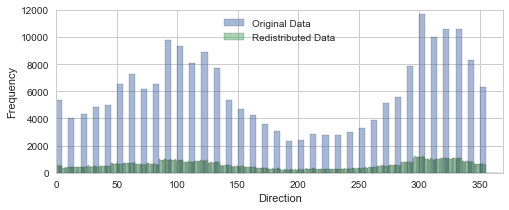

In [28]:
if integer_data:
    df = randomize_angle(df, DIR_REDISTRIBUTE, SECTOR_LENGTH)

Redistribute upward, e.g. 0 -> [0,1]


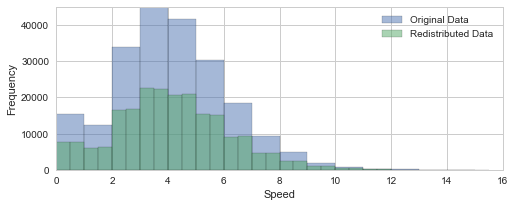

In [29]:
if integer_data:
    if delete_zero:
        redistribute_method = 'down'
    else:
        redistribute_method = 'up'

    df, speed_redistribution_info = randomize_speed(df, redistribute_method)

## 1.6 Generate (x,y) from (speed,dir)

In [30]:
# Cook orientation
# df['dir']= (df['dir'] + 180)%360

In [31]:
# There might be a small dot in the centre, which is due to too many zero (more than 1 speed) in center
# Scatter plot in matplot has performance issue, the speed is very slow
df['x'] = df['speed'] * cos(df['dir'] * pi / 180.0)
df['y'] = df['speed'] * sin(df['dir'] * pi / 180.0)

# 2. Re-select Data and Overview

## 2.1 Data Overview

In [32]:
## Summery of the data selection
print('Knot unit?', knot_unit)
print('Report type used:', report_type_most_used)
print('Sampling time used:', sample_times)
if 'speed_redistribution_info' in globals():
    print('Speed redistribution info:', speed_redistribution_info )

df_all_years = df # for later across-year comparison
df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn == 0) and (speed >= 0.5) and (date%10000 > 900) and (date%10000 < 1000)' )
df.describe()

Knot unit? False
Report type used: FM-15
Sampling time used: [0, 30]
Speed redistribution info: Redistribute upward, e.g. 0 -> [0,1]


date          HrMn           dir         speed         month  \
count  4.364500e+04  43645.000000  43645.000000  43645.000000  43645.000000   
mean   2.012065e+07   1149.361897    184.855558      4.510031      6.525398   
std    1.413268e+04    692.143261    114.281527      1.985185      3.450254   
min    2.010010e+07      0.000000     -4.990807      0.000014      1.000000   
25%    2.011040e+07    500.000000     84.960996      3.140141      4.000000   
50%    2.012070e+07   1100.000000    167.771473      4.378020      7.000000   
75%    2.013093e+07   1700.000000    302.683184      5.745324     10.000000   
max    2.014123e+07   2300.000000    354.993974     15.599095     12.000000   

       dir_windrose             x             y  
count  43645.000000  43645.000000  43645.000000  
mean     212.598350      1.026602      0.397969  
std      239.640963      3.023688      3.731862  
min        0.000000    -12.007052    -11.171185  
25%       80.000000     -0.933567     -2.431346  
50%      140.000000      1.387379      0.066644  
75%      280.000000      3.309396      3.328388  
max      999.000000     15.492499     14.489926

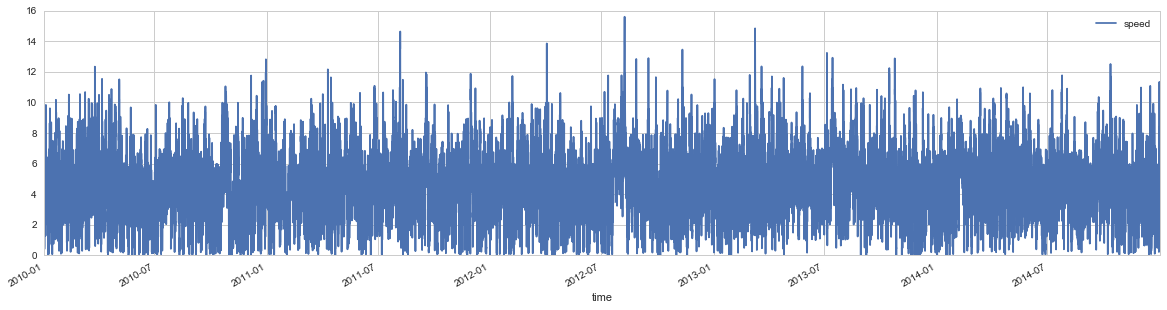

In [33]:
df.plot(y='speed',legend=True,figsize=(20,5))

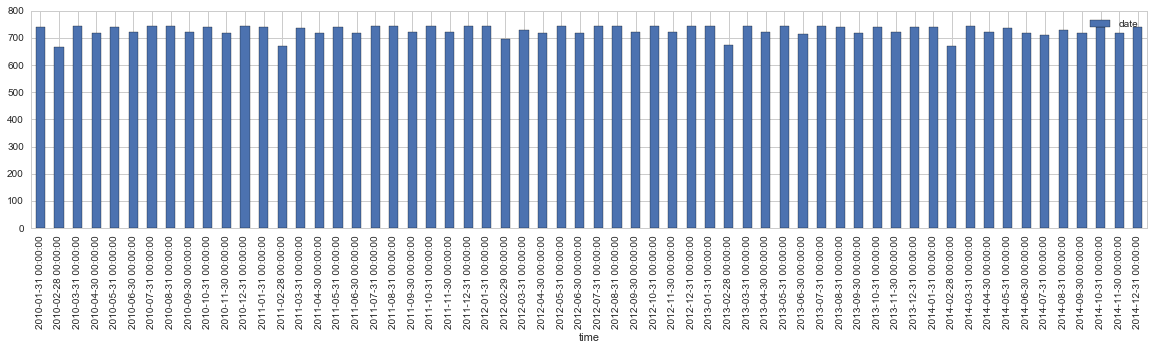

In [34]:
# Accumulation by month
df.resample('M').count().plot(y='date', kind='bar',figsize=(20,4))

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


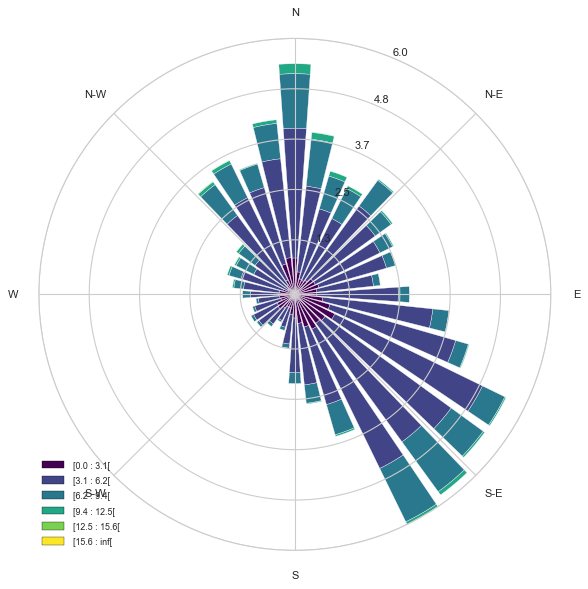

In [35]:
# 90 degree is east
ax = WindroseAxes.from_ax()
viridis = plt.get_cmap('viridis')
ax.bar(df.dir_windrose, df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=viridis)
ax.set_legend()

In [36]:
if len(df) > 1000000:
    bins=arange(0,362)
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min')
    
    df = df_all_years.sample(n=500000, replace=True)    
    df['dir'].hist(bins=bins, normed=True,alpha=0.5,label='min resmapled')
    plt_configure(legend=True, figsize=(20,4))

In [37]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 1. Histogram comparison
fig = plt.figure()
df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data', normed=True)             
plot(x, y_weibull, '-', color='black',label='Weibull')   
plt_configure(figsize=(4,3),xlabel='V',ylabel='PDF', legend=True)

# 2. CDF comparison
fig = plt.figure()
plot(log(x), log(-log(1-y_ecdf)),'o', label='ECDF')
plot(log(x), log(-log(1-y_cdf_weibull)),'-', label='Weibull')
plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'}, figsize=(4,3))
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:11: RuntimeWarning: divide by zero encountered in log
D:\ProgramData\Anaconda3\lib\site-packages\ipykernel\__main__.py:12: RuntimeWarning: divide by zero encountered in log


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAARYAAADPCAYAAAAwC/4cAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAIABJREFUeJzt3XdYVFf+x/H3MDAKDCqCEisC6tqDYu9ribGLiGABDSaa
amKKiW5MsBON2ewqupqwvyRq1oIlYkGDoqhYEaIGW2xRUUCKMCCMMPf3h8usSFFwZi4M5/U8PI/M
uWfuhzv45ZZzz1VIkiQhCIJgQBZyBxAEwfyIwiIIgsGJwiIIgsGJwiIIgsGJwiIIgsGJwiIIgsFZ
yh3gRcXExMgdQRCqLA8Pj2Jfr/SFBUr+4UwtJiZGZKmgOUBkKUl5s5T2R10cCgmCYHCisAiCYHCi
sAiCYHCisAiCYHCisAiCYHCisAiCYHCisAiCYHCisAhCBTNp0iTOnj0LgFarxcPDg++//17f7ufn
x4ULF4r0i4qKYuPGjdy+fZuxY8c+9/reeust/ftevXr1BdM/JgqLIFQwPXr04PTp08DjQWg9e/bk
0KFDAOTm5nLnzh1atGhRpF/v3r3x8fExadaSmMXIW0Ewlk8++YTNmzcb9D29vb3x9fUtsb179+6s
XLmSgIAADh06hLe3N19//TWZmZn8/vvvdO7cmVOnTvH3v/8dpVJJo0aNmDdvHmFhYVy7dg1fX19S
U1N58803SUlJoW/fvrzzzjt89tlnDBkyhN69exMVFcXu3bsJCgoy6M9WQOyxCEIF06pVK65du4Yk
SZw6dYrOnTvTrVs3oqOjOXnyJD179mTOnDmsWLGCdevW4eTkxLZt2wq9R3Z2NkuXLmXDhg0cPnyY
ixcvmvRnEHssglCKpUuXsnTpUoO/b6n32VhY0KJFC6KioqhTpw4qlYrevXtz8OBBLl68yIQJE5gz
Zw4ffPABADk5OXTv3h1nZ2f9e7Ro0QI7OzsA2rZty/Xr1wutw9hTXYvCUoHpdDrS0tLK3VeovHr0
6MHq1asZOnQo8PhG25UrVwJgb2/PSy+9xMqVK7Gzs2P//v3Y2Nhw9+5dff+rV6+SlZVFtWrVOHv2
LD4+Phw7dozk5GQA4uPjjZrfaIVFp9MRGBjIpUuXUKlULFiwoFBF3blzJz/++CNKpZLmzZsTGBgI
UGqfyqq8BSI1NZUdh6+itqtZpn5Zmgxebiz+ZlRm3bt35/PPP2fJkiUAqFQq7OzsaNmyJRYWFvzt
b39j6tSpSJKEra0tS5YsKVRYatasyYwZM0hNTWXIkCE0bdoUb29vZs+eTVhYGE2aNDFqfqP99kVE
RKDVatm4cSNxcXEEBQWxatUq4PGu27fffktYWBjW1tZ8+OGHREZGkp+fX2KfyiwtLY0fd5zGVl2j
TP2S7t3GrqYDdjXsy7HW7HL0ESqKBg0acOnSpUKvFeyxAPTs2ZOePXsWah89erT+3zt27Cjynm3b
tiUsLKzI6wX/x9auXftCmZ9ktMISExNDr169AHB3d+f8+fP6NpVKxYYNG7C2tgYgLy+PatWqcfjw
4RL7VHa26hplLhCazAdGSiMIxmW0wqLRaFCr1frvlUoleXl5WFpaYmFhgaOjI/C4SmZnZ9OjRw/2
7NlTYp/SVKRZ5IrLkp6ezr17GWRqHpbpvZKTklAqVeTlly1DluYBTWvXqDDbpaLkAJGlJIbOYrTC
olarycrK0n+v0+kKFQidTsfSpUu5fv06y5cvR6FQPLNPSSr6TFwpKSn8kXq5zHssCkmL0lJFXaf6
ZeqXmWENZFeI7WIOM6UZgzlkkWUGuQ4dOhAVFQVAXFwczZs3L9T+xRdfkJuby8qVK/WHRM/qIwhC
5WC0PZaBAwdy9OhRfH19kSSJRYsWERYWRnZ2Nm3atCE0NJSOHTsyadIkAPz9/YvtIwhC5WO0wmJh
YcG8efMKvebm5qb/d0kjAZ/uIwhyepGxRCWxty/PVb7KRQx2qODyHmnJztJgY6t+9sKCwZV3qEBJ
sjQZTBrR8ZnLnThxgg8++ICmTZsiSRJ5eXn4+/szZMiQYpdPSEjg4sWL9OvXzyA5X5QoLBVYRnoq
//p6Fg/S7uPl9y6DRk7E0tJK7lhVTnmGChhC165d+fvf/w5AVlYWfn5+uLi40LJlyyLLHj9+nGvX
ronCIpQuLSWJVUtmkpx4B1W16vz83RKORPxCwHtf0qxVe7njCSZma2uLj48Pu3fvZt26ddy7d4+k
pCT69evH9OnTWbNmDTk5ObRv3x47OztWrFiBJElkZWWxbNkyXFxcTJpX3N1cAaXeT2TBTH+SE+/Q
b6gv//zpAH0HefHn9UsEfjie7//xBZrMdLljCibm4OBAfHw87u7uhISEEBoayoYNG1AqlUydOpVh
w4bRv39/rly5wtKlS1m7di2vvPIK4eHhJs8q9lgqmJTkeyz8dBKJCX/Sb4gPw7xfx66mPW/MWEDv
V0bz7+WBRO7ZTEz0fsa/8Qk9+49EoVDIHVswgYSEBNq3b8+5c+c4fvw4arUarVZbZDknJycWLlyI
jY0NiYmJdOjQweRZxR5LBZKSfJeFMx8XlZG+0xg8elKhovGX1h1YuGIL46Z8TG7OQ/719SwWzpzE
nT8NM52gUHFpNBo2b96MnZ0ddnZ2LFu2jICAAHJycpAkCQsLC/0d7XPmzGHRokUEBQVRt25do0+R
UByxx1JB3E9KYOGnk0m6e4tR495kjP907iXcLLKcpaUVw7yn0KX3q6z912Jiju1n1tueDBsTwEjf
aVSrbi1DevOWpcmQ5b2OHz+On58fFhYW5Ofn89577+Hi4sJHH31EXFwcKpUKZ2dnkpKSaN68OatW
raJ169aMGDGCCRMmYG1tjaOjI0lJSQbL/7xEYakAkhPvsPDTySTfu43nhLfxmvjuMw9v6jg14MMv
V3D62H5+WrmQXzasJvrgLia//TluLdqZKLn5s7e3f67Lw2V9zxs3bpS6TJcuXTh27FixbcXduezk
5MTevXsB9HO4yEkUFpklJ95h4cxJJCfeYfSEd/Dye7dM/Tt2608b965sXb+S8G0/sfSLN5n8zhya
evYxUuKqxcLCAgcHB7ljVDriHIuMku89UVQmvlvmolKgurUt41//hPnLN2OlqsYvG9YUe1JPEExF
FBaZJN27rb+kPMbvPbwmvvPC7+ns2oKBw8eTlpLIrl27DJBSEMpHFBYZJN29xYKZ/txPSsB70vt4
TnjbYO89YuwbVKtuw/r16wtNQSEIpiQKi4llPkhjwcxJpCTdZezkGYwa96ZB39+upj39h/qQnp7O
8uXLDfregvC8RGExsYhdG0hJvstI32mM9J1qlHUMHD4OOzs7lixZQnq6GKErmJ4oLCaUn5/H/t0b
qW5jy/CxbxhtPdY2anx8fEhLS2PZsmVGW48glEQUFhOKOXaAtPuJ9B4wCmsbW6Oua+TIkTg5OfHt
t9/qnyUjCKYiCosJ/Rr2MwADh483+rqsra3529/+hkajMdrzeQWhJKKwmEjC7evE/3aC1u5dqd/I
1STrnDp1Ko0bNyY4OJg7d+6YZJ2CAKKwmMyh8C2AafZWClSrVk0/afmCBQtMtl5BEIXFBDIzMzke
FY5DnXp06PpXk6570qRJNGvWjO+//55r166ZdN1C1SUKiwls2rSJ3Jxs+g/1Qak0/u1ZOp2OBw8e
kJKSwoMHD/j444/Jy8tj9uzZpKSklPolHiYvGIK4CdHIJEkiJCQES0sr+r46xiTrzM7K5PCtVJLz
LwOgq9maBo3d2LRpMy26jKRewybF9iuY6FncdCe8KLHHYmSRkZFcvnwZj279qFnLdP9hrW3U2NWw
x66GPTVrOTD2tRlIko49W3/Uv/70l6FmohcEUViMLDg4GIA+g7xkzeHRtR9uf2nHySN7ufFHvKxZ
BPMnCosR3bp

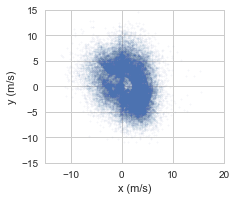

In [38]:
df.plot(kind='scatter', x='x', y='y', alpha=0.05, s=2)
plt.gca().set_aspect('equal')
plt_configure(figsize=(3.2,3.2),xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 2.2 Overview by Direction

In [39]:
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 10

In [40]:
original_incre, incre = SECTOR_LENGTH, rebinned_angle
start, end = -original_incre/2 + incre/2, 360

max_speed = df.speed.max()
max_count = max_count_for_angles(df, start, end, incre)
plot_range = [0, max_speed, 0, max_count*1.05]

for angle in arange(start, end, incre):
    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)   
    
    fig = plt.figure()
    sub_df['speed'].hist(bins=arange(0, max_speed), alpha=0.5, label='Data')
    title ='%s (%s - %s), %s' % (angle, start_angle, end_angle, len(sub_df)) 
    plt.axis(plot_range)
    plt_configure(figsize=(3,1.5), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAM0AAAB6CAYAAAAcc9ekAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAALEgAACxIB0t1+/AAAEVxJREFUeJzt3XtMU/f7B/B3uVT5Urk4BM0mm8gQb1y8IWHg1BCWERQQ
ERD8RZwTpplucYJu4AVU0GhiDIiKTFfdxJ/CZqIzG27i5m0KOEW8FQduU+7XQgFpP98//HpipbQ9
UiiU55WY2HOe0z4f6ptz6fFTAWOMgRCiNSN9N0DIQEOhIYQnCg0hPFFoCOGJQkMITxQaQngyqNA8
e/YMW7ZsgYeHBzw8PLBjxw7I5XKd1QOAVCpFQEAAGhoauq1JTEzEuHHjlP5s2bKl2/qHDx9i8eLF
cHV1hb+/Py5evKh5sBosW7asSw+HDh3qtv7GjRsICgqCi4sLFixYgNu3b3PrfvrpJ6xfv553D35+
fl16OHfuXJe6Bw8eYNKkSbh27ZrK59G0vs8xA5KSksJ8fX1ZUVERu3TpEvPy8mJpaWk6q2eMsaSk
JJaRkaG2JiwsjKWnp7OqqiruT3Nzs8pamUzGfHx8WEJCApNIJCwtLY1NnjyZlZWVaR6wGt7e3iw3
N1eph9bWVpW1FRUVzN3dne3Zs4dJJBK2adMm5uHhwRobG7maBQsWsGvXrmn9+u3t7Wz8+PHsypUr
Sj20t7cr1XV2drLg4GDm5OTErl692uV5NK3XB4MJTVtbG3N1dWV5eXncspycHObp6cnkcnmP6xlj
rKqqirm5ubGGhga1vcyYMYPl5+dr1Xdubi7z9PRkHR0d3LLIyEiWkpKi1faqNDc3MycnJyaRSLSq
37t3LwsMDOQeKxQKNnfuXCYWi5X6jIyM1LqHu3fvsnHjxnUb1Bf27dvHFi9e3G0oNK3XB4M5PLt7
9y5kMhlmzJjBLZs2bRpqa2vx+PHjHtcDQHZ2Ntzd3WFpadltH9XV1WhoaMCYMWO06ruwsBDu7u4w
NTXllk2fPh1FRUVaba+KRCKBiYkJ7O3ttaovKirC9OnTuccCgQBTp05V6mH27NkoKirC/fv3tXrO
0tJSjBo1CmZmZt3WPHz4EEeOHMHmzZtfa72+GExoKisrYWZmhmHDhnHLRowYAQCoqKjocT0AXLhw
Ad7e3mr7kEgkEAgEOHjwIGbNmoUPP/wQWVlZUCgUKuurqqpga2urtMzGxgaVlZVqX0dTDyKRCPHx
8Xjvvfcwf/585ObmdluvTQ+WlpaYPHky8vPzte5BKBQiJiYGXl5eCA0NVdpWLpcjPj4eq1evxsiR
I7tsr2m9PhlMaGQyGYYMGaK0TCgUAgA6Ojp6XC+Xy1FSUgJHR0e1fTx69AhGRkawt7fHgQMHEB0d
jbS0NGRmZvLqW1UP2iotLUVbWxs8PT2RmZmJwMBAJCQk4MyZMz3qwdHREcXFxVr30NjYiODgYGRm
ZsLT0xMxMTEoLCwEAGRmZkIkEmHRokUqt9e0Xp9M9N2ArgwdOrTLm/zisapDBL71DQ0NkMvlsLa2
5pZ99NFHKCgo4B6fOXMGERER8Pf3h5WVFQBg3LhxaGxsxOHDh/Hxxx9r3cfQoUNVjtPf3x9Pnjzh
Hqs6jFu7di1iYmK4w0hnZ2f8/fffEIvF8Pf3f+0erKys8OjRI5V9vWrXrl1ob2+HSCQCAIwfPx73
7t3DsWPHYGFhgaysLJw8eRICgaDLthKJRO16fTOY0IwcORKtra2QSqXcG1VdXQ0AsLOz63H9izfv
5cOsrVu3oq2tjXtsa2sLgUDABeYFR0dH1NTUQC6Xw9jYWGmdnZ0d97ovVFdXq+wBAA4cOIDOzk6V
614wNjbuct41duxYXLhwQWW9tj3I5XIYGWl3cGJqaqp0nvaih9u3b+PcuXNobm7GvHnzlNYvX74c
gYGBsLW1Vbte3eX7vmAwoXF2doaZmRkKCgowa9YsAM8/e7CxsVF5Qsy33traGiYmJqivr+eWqfqH
vXXrVkgkEnz99dfcsuLiYrzzzjtdAgMA7u7u2LVrFzo7O2FiYsL14e7urnKcb775profAwBg1apV
sLS0xNatW7lld+7cgYODg8p6d3d3pUAxxlBYWIjo6Giluvr6eu68T5Pg4GDMmTMHq1at6tJDZGQk
AgICuOUymQzz589HcnIyvLy8YGxsrHa93un78p0uJSUlsTlz5rAbN26wy5cvMy8vL6XPVOrr61l9
fb3W9a8KCQlh+/fvV9vD1atXmbOzM9u/fz8rLy9nubm5zM3Njf3www+MseefO1RVVTGZTMYYY0wq
lTIvLy8WHx/PJBIJS09PZy4uLuzx48ev/XPIzc1lEyZMYCdPnmTl5eXs8OHDbOLEiez69euMseef
obz8mcnTp0+Zq6sr27VrF5NIJGzz5s1s5syZrKmpSel5g4KCWFZWFmPs+edLVVVVrLOzU2UPe/fu
ZVOmTGE///wz++uvv9ju3bu7/fxJKpWqvaSsaX1fEzCmv/+E9vL5gC50dHTgyJEjuHr1KkxNTeHj
44OwsDDukCIpKQkAkJCQoFX9q3JycvDw4UPExcWp7eOPP/5ATk4Onj59CmtrawQEBGDu3LkAnh/2
rF69GitWrOD2cGVlZcjKykJ5eTns7OwQGRkJFxeXHv0s8vLy8OOPP6KmpgZ2dnZYuHAhd1m5pKQE
ycnJ+OqrrzBhwgQAz/eG33zzDSorK2Fvb4+lS5cq7ZlaW1uxYsUK7NixA6NGjUJ+fj7279+PPXv2
qNz7KBQKfP/998jPz0dDQwNGjx6NyMhIODs7d6lta2tDdHS0Uj981veWqVOnql6hTbIyMjJYaGgo
CwoKYidOnGBlZWUsLCyMhYeHs8TERO7DwOzsbBYUFMQWLlzIfvnlF43Pe+PGjZ4Evs9VVFQwV1dX
Vl1drbZuoI1LG6mpqWzJkiVKy5YvX67xZ9HfdfdeqXsPNZ7VXbt2DUVFRfjuu+8gFotRUVGB7du3
Y82aNfj222/BGMP58+dRXV0NsViM48eP49ChQ9i9e3ePLpv2R3Z2dggKCkJ2dra+W+lTjDHk5eUh
NjaWW1ZYWAgjIyPY2NjosTP90Bia33//HU5OTli5ciViYmLw/vvv486dO9wn6T4+Prh8+TJu3boF
d3d3CIVCDBs2DPb29rh3716vD6Cvff755zh79qzaGzYNzblz5zB69GjMnDmTW+bi4oJ9+/bpsSv9
0Xj1rL6+Hk+ePEFGRgb++ecfxMbGgjHGXYI1NzdHc3MzpFKp0qfr5ubmkEqlGhvQ9XlNX9iyZQtK
S0vV1gzEcXXH1tYWn3zyiUGN6WV8x6UxNFZWVnBwcIBQKISDgwOGDBmidJtJS0sLLCwsIBKJ0NLS
orT85RB1p9uTrQGsoKDA4MZliGMCuh+XuiBpPDybOnUqfvvtNzDGUFlZCZlMBk9PT+7/Nly8eBHT
pk2Di4sLCgoK0N7ejubmZpSWlsLJyakHwyGkf9K4p5k9ezauX7+OkJAQMMaQmJiIt956CwkJCdi9
ezccHBzg5+cHY2NjREVFISIiAowxfPbZZ13uZyLEEGh1R8C6deu6LDt69GiXZaGhoQgNDe15V4T0
YwZzlzMhfYVCQwhPFBpCeKLQEMIThYYQnig0hPBEoSGEJwoNITxRaAjhiUJDCE8UGkJ4otAQwhOF
hhCeKDSE8EShIYQnCg0hPFFoCOGJQkMIT1qFpra2FrNmzUJpaSnKy8sRHh6OiIgIbNy4kZtF/8SJ
EwgODkZoaCh+/fXXXm2aEH3SGJpnz54hMTGR+66SwTq7JiEvaAxNamoqwsLCuK+XG8yzaxICaJiN
JicnB8OHD4e3tzcOHDgAADqdXRMwrJkoX2aI4zLEMQE6nmHz1KlTEAgEuHLlCu7evYu4uDjU1dVx
63s6uyZAM2w

## 2.3 Overview by Month

In [41]:
month_incre = 1
current_df = df.query('speed>=1')
for month in arange(1, 12+month_incre, month_incre): 
    end_month = month+month_incre
    sub_df = current_df.query('(month >= @month) and (month < @end_month)')
    if len(sub_df) > 0:
        if month_incre == 1:
            title = 'Month: %s' % (month)
        else:
            title = 'Month: %s - %s ' % (month, end_month-1)
        ax = WindroseAxes.from_ax()
        ax.bar(sub_df.dir_windrose, sub_df.speed, normed=True, opening=0.8, edgecolor='white', nsector=36, cmap=plt.get_cmap('viridis'))
        plt_configure(figsize=(3,3), title=title)
align_figures()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook.py:136: MatplotlibDeprecationWarning: The axisbg attribute was deprecated in version 2.0. Use facecolor instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


<img style="margin:0" align="left" src="data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAOwAAADxCAYAAADIm1tRAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAMTQAADE0B0s6tTgAAIABJREFUeJzsnXd4W/X1xj/aw9q25L2d2JmQBBKyCGSzmgJlFEpbSksH
o5TukV+AtBRaWmZbSilQRoGyyixhpFlkD7KceG9blmXJsvb+/WGkxLEd28m1k1C/z+PnsXWv7r2W
7nvP+Z7znnNE8Xg8zhjGMIYzAuJTfQFjGMMYho4xwo5hDGcQxgg7hjGcQRgj7BjGcAZhjLBjGMMZ
hDHCjmEMZxDGCPs/gLHM3ecHY4QdBSxcuJDS0lLuu+++fre3tLRQWlpKaWkpDodD0HN/9NFHrFq1
Kvn3o48+yrRp0wQ9h8fj4cILL+T9998X9Lhj6Isxwo4SRCIRH374Yb/b1qxZM2Ln/cc//kF7e/uI
Hd/j8fC9732P1tbWETvHGI5gjLCjhGnTptHc3Ex5eXmfbe+//z6lpaWn4KpODtu3b+eqq67i8OHD
p/pS/mcwRthRwoQJE8jNze1jTVtbW9m/fz/Lly/v854PP/yQK6+8krPPPpsFCxbw0EMPEYlEktsX
LlzI3/72N1atWsXMmTOZPn06P/3pT/F4PADccMMNbN++nXXr1lFaWkpzc3Pyve+99x7Lli1jypQp
XHHFFezevTu5rbm5mdLSUh599NHj/k+33HIL48eP58knnzyhz2QMw8cYYUcRS5cu7eMWr1mzhrPO
OouMjIxer7/88svceuutTJ06lccee4yvfOUrPPXUU/zsZz/rtd9f//pXuru7+eMf/8gdd9zBu+++
y1/+8hcAVq1axcSJE5k+fTovv/wyFosFAL/fz4MPPsjtt9/Oww8/jN/v57bbbks+DCwWCy+//DJX
XXXVcf+fF154gYcffhiTyXRSn8sYhg7pqb6A/yUsX76cv//979TU1FBcXAz0uMMXXXRRr/2i0SgP
PfQQl1xySTJgNG/ePLRaLatWreKb3/wmZWVlAGRkZPDHP/4RkUjEvHnzWL9+PU8++SQzZ85kwYIF
aDQa1Go1d955J88++yzQEzX+/e9/z9lnnw1AJBLhtttuo7q6mrKyMuRyeXLb8TB+/HjBPpsxDA1j
FnYUMWXKFDIzM/nggw8AaGtrY9++fSxbtqzXfrW1tTgcjj5u8iWXXALAzp07ex1TJBIl/zabzUCP
dXW73f1eh0QiYerUqcm/s7OzAQbcfwynD8YIO4oQiUS93OI1a9YwdepUMjMze+3ncrkASE1N7fW6
VqtFLpcn16gAKpWqzzkkEgnz5s3jt7/9bb/XoVAoEIuPfPWJ32Ox2An+Z2MYLYwRdpSxdOlSDh48
SHNzM2vWrOnjDgMYDAYAOjs7e73e3d1NKBRKbj8efvazn7Flyxa6urqEufAxnBYYI+woY/r06ZjN
Zl566SX27t3bxx0GKCwsxGg09hEivPfee8ljDAaNRsPq1aupr6/vFVkew5mNsaDTKEMsFrNkyRKe
eeaZ5Jr2WEgkEm699VZWr16NXq9n0aJFVFRU8Oijj7J8+fIhB3vmzZuH2Wxmz549qFQqgsHgkN4X
CoUoLy8nIyOjT/R6DKcWYxb2FGDp0qWEw+F+c68JfOUrX+E3v/kN27Zt4zvf+Q4vvPACN954Iw88
8MCwznXPPffg9/ux2+1UV1cP6T02m41rrrmGV155ZVjnGsPIQzTW0+nzhebmZr761a+ydu3a5Gub
Nm3ipptu4uOPPyYnJ+cUXt0YThZjhB3DGM4gjLnEYxjDGYQxwo5hDGcQxgg7hjGcQRhL63wOEIvF
iEajyc4S8Xg8+btIJOr1I5FIekkZTwWeeOIJXnvtNeRyORdffDHf/e53k9va29u5+eabk397vV7a
29vZtm0barX6VFzuaYUxwp7GiMfjhMNhQqEQ4XA4+RMMBo+8FgkTjw0vbiiRiJHJ5MhkMuRyOXJ5
z++JH4VCgVQ6MrfG5s2beeutt3j11VdRq9XccsstfPDBByxduhSA9PR03nzzTaDn///mN7/Jt771
rTGyfoYxwp4miMfjhEIhfD4fXq8Xr9eLz+cjFoshFouTP1KpFKlUikqlQq/Xc9i3nR3uNQRwEyJA
nCiIQRqX84XIj3lL+nsi8RASZMhRoUbPQtOXMUgshEKh5DkjkQixWIxYLEY8Hkcmk6FWq5PVPmq1
WhASl5eXM3/+fLRaLQDz58/no48+ShL2aLz99ttEIhGuueaakz7v5wVjhD1FiEQiuN3uPuSUSqXI
ZDJUKhWpqano9XpkMtmAx6loD+PyWo9/MjFECeMnjJ9u1AYF2brsfneNx+P4/X5cLhderxe73U44
HCYWi/UicUpKChqNZtju9aRJk7j33nv59re/jUqlYu3atf02iYvFYvzpT38atlDk844xwo4igsEg
XV1dOJ1OvF4vEokkSQKz2Yxer0cikQzrmErRJMrUdxCOQiQeIxqDGHHEMSACmdLvEBeBVCxCJhYh
EwPx1AGPJxKJkhb1aIRCIZxOJ93d3XR0dNDa2opIJEKv12MwGIZ87bNnz+aKK67ghhtuwGAwMHv2
bPbu3dtnv82bN2OxWJgyZcqwPo/PO8YIO4KIx+P4fD6cTiddXV0Eg0FkMhkajYbs7OykW3gyaPIE
uWvXxj6vq0QSZhYv4bGDW/HHo722vb10+IXncrmc9PR00tPTgR4L6HA46OzspLGxkWg0SkpKCiaT
Cb1ej0Kh6Pc4Ho+HJUuWcOONNwLw9NNPk5ub22e/jz76iEsvvXTY1/l5xxhhBUY8Hk+6kl1dXcRi
MRQKBQaDgfT09OO6tycCtVQ+7PeknMB7joVYLCYtLY20tDSgJ5prs9mwWq00NTWhUCgwGo2YzWbk
8iPna2lp4Uc/+hGvv/46gUCAV155hdWrV/c5/q5du/ja17520tf5ecMYYQVCNBrF6XTS3t5OMBhE
oVCQkZGBxWLpVSwuNIZLWLlYglIi7EMDICUlhcLCQqDH9W9vb6ezsxOr1Yper8disaDVaiktLeXS
Sy9lxYoVRKNRvv71rzNjxgx++ctfsnDhQhYtWgRAU1MTWVlZgl/nmY4xLfFJIhAIYLPZsNvtiMVi
DAYD2dnZglvSgbDN1sB1/32+z+sqkYR/FC/hazUf9nKJLUoNH1z0HbTy/l1WoeHxeGhpacHr9SKV
SklPTyc1NXXE0kafd4x9aieAeDxOV1cX7e3teL1elEol+fn5mEymURclqKXDezAYFCpSZCfvEg8V
Go2G0tJSotEobW1tWK1WWlpaMJlMWCyWsfzqMDFG2GEgHo/jcDhoaWkhGo2i0WiYNGkSSqXylF3T
cF3ibLUO8SlQOkkkEnJycsjJycHpdNLa2sqhQ4fQaDTk5OSQkpIy6td0JmKMsENAPB6nu7ubpqYm
wuEwRqOR3NzcYadgRgJqqRyJSER0iCubDLV+hK9ocBiNRoxGI36/n4aGBg4fPpxcSpzKh9+ZgDHC
DgKPx0NTUxN+vx+DwUB+fv5pQdQE1FIZerkKR9A3pP318tOHECqVirKyMvx+P3V1dRw8eJDU1FSy
srJ6RZbHcARjhB0Afr+f5uZm3G43Wq2WKVOmjFogaThQS+Xo5cohE3a4a97RgEqlYuLEiXg8Hurr
6zlw4AAWi4WMjIyx4NQxGPs0jkEkEqGpqQmHw4FarWbChAl9ev+eTpCJJWSodNS5hzamUogc7EhB
o9EwefJkHA4Hzc3NdHR0kJmZSXp6+imvMDpdMEbYo+B0OmloaEAsFjNu3Dh0Ot2pvqQhIUs99Os8
nQmbgMlkwmQy0draSltbGw6Hg6KiorH1LWOEBXqsakNDAy6XC7PZTHZ29oiKHYRGqmLoqRHVaegS
D4SsrCwsFgv

# 3. Create input data and configuration

In [42]:
SPEED_SET = array(list(zip(df.x, df.y)))
if 'NUMBER_OF_GAUSSIAN' not in globals():
    NUMBER_OF_GAUSSIAN = 3
FIT_METHOD = 'square_error'
DEFAULT_BANDWDITH = 1.5 if knot_unit else 0.7
fig_list = []

In [43]:
fit_limit = ceil(df['speed'].quantile(.95))
fitting_axis_range = arange(-fit_limit, fit_limit+1, 1)
print(fitting_axis_range)

FITTING_RANGE = []
for i in fitting_axis_range:
    for j in fitting_axis_range:
        FITTING_RANGE.append([i,j])

[-8 -7 -6 -5 -4 -3 -2 -1  0  1  2  3  4  5  6  7  8]


In [44]:
plot_limit = ceil(df['speed'].quantile(.95))
PLOT_AXIS_RANGE = arange(-plot_limit, plot_limit+1, 1)

# 4. Kernel Density Estimation

In [ ]:
sample = SPEED_SET
KDE_KERNEL = 'gaussian'
# KDE_KERNEL, bandwidth = 'tophat', 1

In [ ]:
%%time
from sklearn.grid_search import GridSearchCV
# from sklearn.model_selection import GridSearchCV  ## too slow

# The bandwidth value sometimes would be too radical
if knot_unit:
    bandwidth_range = arange(0.7,2,0.2)
else:
    bandwidth_range = arange(0.4,1,0.1)

# Grid search is unable to deal with too many data (a long time is needed)
if len(sample) > 50000:    
    df_resample=df.sample(n=50000, replace=True)
    bandwidth_search_sample = array(list(zip(df_resample.x, df_resample.y)))
else:
    bandwidth_search_sample = sample

grid = GridSearchCV(neighbors.KernelDensity(kernel = KDE_KERNEL),
                    {'bandwidth': bandwidth_range}, n_jobs=-1, cv=4) 

grid.fit(bandwidth_search_sample)
bandwidth = grid.best_params_['bandwidth']
print(bandwidth)

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
D:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH

kde = neighbors.KernelDensity(bandwidth=bandwidth, kernel = KDE_KERNEL).fit(sample)

points = FITTING_RANGE
# very slow if the dataset is too large, e.g. 100,000
# kde returns log prob, need to convert it
kde_result = exp(kde.score_samples(points))
print('bandwidth:', bandwidth, len(kde_result))
print(kde_result[:5])

In [ ]:
# Plot jPDF
X = Y = PLOT_AXIS_RANGE
# Can't work if pass as generate_Z_from_X_Y(X,Y, exp(kde.score_samples())), need to use lambda
# see http://stackoverflow.com/questions/21035437/passing-a-function-as-an-argument-in-python
kde_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(kde.score_samples(coords)))
colorbar_lim = 0, kde_Z.max()

plot_3d_prob_density(X,Y,kde_Z)

fig_kde,ax1 = plt.subplots(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, ax=ax1)

with sns.axes_style({'axes.grid' : False}):
    from matplotlib import ticker
    fig_hist,ax2 = plt.subplots(figsize=(3.5,2.5))
    _,_,_,image = ax2.hist2d(df.x, df.y, bins=PLOT_AXIS_RANGE, cmap='viridis',)
    ax2.set_aspect('equal')
    cb = plt.colorbar(image)
    tick_locator = ticker.MaxNLocator(nbins=6)
    cb.locator = tick_locator
    cb.update_ticks()
    plt_configure(ax=ax2, xlabel='x'+speed_unit_text,ylabel='y'+speed_unit_text)
align_figures()

In [ ]:
kde_cdf = cdf_from_pdf(kde_result)

# 5. GMM by Expectation-maximization

In [ ]:
sample= SPEED_SET
clf = mixture.GaussianMixture(n_components=NUMBER_OF_GAUSSIAN, covariance_type='full')
clf.fit(sample)
print(clf.converged_)

In [ ]:
gmm_em_result = read_gmm_em_result(clf)
pretty_print_gmm(gmm_em_result)

In [ ]:
fig,ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm_em_result, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

In [ ]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, lambda coords: exp(clf.score_samples(coords)))

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = exp(clf.score_samples(points))
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig_em = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z,xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar_lim=colorbar_lim)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

## Goodness-of-fit Statistics

In [ ]:
points = FITTING_RANGE
gmm_pdf_result = exp(clf.score_samples(points))
gof_df(gmm_pdf_result, kde_result)

# 6. GMM by Optimization

In [ ]:
sample = SPEED_SET
points = FITTING_RANGE
max_speed = df.speed.max()
print(FIT_METHOD)

In [ ]:
# from GMM,EM 
# GMM format: weight, meanx, meany, sigx, sigy, rho
x0 = gmm_em_result

cons = [
        # sum of every 6th element, which is the fraction of each gaussian
        {'type': 'eq', 'fun': lambda x: sum(x[::6]) - 1},
        # # limit the width/height ratio of elliplse, optional
#         {'type': 'ineq', 'fun': lambda x: width_height_ratios_set(x) - 1/3},
#         {'type': 'ineq', 'fun': lambda x: 3 - width_height_ratios_set(x)},
]

bonds = [(0., 0.99),(-fit_limit, fit_limit),(-fit_limit, fit_limit),
         (0., fit_limit),(0., fit_limit),(-0.99, 0.99)]*(len(x0)//6)

result = sp.optimize.minimize(
    lambda x0: GMM_fit_score(x0, kde_result, points, FIT_METHOD),
    x0,
    bounds = bonds,
    constraints=cons,
    tol = 0.000000000001,
    options = {"maxiter": 500})
result

## 6.1 GMM Result

In [ ]:
gmm = group_gmm_param_from_gmm_param_array(result.x, sort_group = True)
mixed_model_pdf = generate_gmm_pdf_from_grouped_gmm_param(gmm)
gmm_pdf_result = mixed_model_pdf(points)
pretty_print_gmm(gmm)

In [ ]:
fig_gmm, ax = plt.subplots(figsize=(3.5,3.5))
plot_gmm_ellipses(gmm, ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)

## 6.2 Goodness-of-fit statistics

In [ ]:
gof_df(gmm_pdf_result, kde_result)

In [ ]:
X = Y = PLOT_AXIS_RANGE
pdf_Z = generate_Z_from_X_Y(X,Y, mixed_model_pdf)# passing a function as an argument

def residule_between_kde_and_gmm(points):
    kde_vals = exp(kde.score_samples(points))
    gmm_vals = mixed_model_pdf(points)
    return kde_vals - gmm_vals 

residual_Z = generate_Z_from_X_Y(X,Y, residule_between_kde_and_gmm)

plot_3d_prob_density(X,Y,pdf_Z)
plot_3d_prob_density(X,Y,residual_Z)
align_figures()

fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,kde_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig_gmm = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,pdf_Z, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
fig = plt.figure(figsize=(3.5,2.5))
plot_2d_prob_density(X,Y,residual_Z,  xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
align_figures()

In [ ]:
def f(V,theta):
    return (mixed_model_pdf([[V*cos(theta),V*sin(theta)]]))*V

In [ ]:
x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(df.speed)

# 3. GMM distribution
y_ = [integrate.nquad(f, [[0, x_val],[0, 2*pi]]) for x_val in x]
y_cdf_gmm = array(list(zip(*y_))[0])

plot(log(x), log(-log(1-y_ecdf)),'o', label = 'Empirical')
plot(log(x), log(-log(1-y_cdf_weibull)),'--', label = 'Weibull')
plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label = 'GMM')
plt_configure(xlabel='ln(V)',ylabel='ln(-ln(1-P))',legend={'loc':'best'})

In [ ]:
# Calculate Speed Distribution
# 1. GMM Model
x = arange(0, max_speed, 0.5)
y_ =[integrate.nquad(f, [[x_-0.01, x_+0.01],[0, 2*pi]]) for x_ in x]
y_gmm = array(list(zip(*y_))[0])*len(df.speed)/0.02

# 2. Weibull
y_weibul = sp.stats.weibull_min.pdf(x, *weibull_params)

df['speed'].hist(bins=arange(0, df.speed.max()), alpha=0.5, label='Data')
plot(x, y_gmm,'-', color='black', label='GMM')
plot(x, y_weibul*len(df.speed), '--', color='black', label='Weibull') 
print('Speed Distribution Comparison')
plt_configure(xlabel='Speed'+speed_unit_text,
              ylabel='Frequency',legend=True, figsize=(4, 2))
plt.gca().set_ylim(bottom = 0)
plt.tight_layout()
plt.locator_params(axis='y', nbins=5)

In [ ]:
# Calculate Angle Distribution
x = linspace(0,2*pi, num=36+1)
y_ =[integrate.nquad(f, [[0, inf],[x_-pi/36, x_+pi/36]]) for x_ in x]
y = array(list(zip(*y_))[0])*len(df['dir']) 

df['dir'].hist(bins=DIR_BIN, alpha=0.5, label='Data')
plot(x/pi*180, y,'-', color='black', label='GMM')
title='Direction Distribution Comparison'
plt_configure(xlabel='Direction'+dir_unit_text, ylabel='Frequency', 
              legend={'loc': 'best'} ,tight='xtight',figsize = (4,2))
plt.tight_layout()
dir_fig = plt.gcf()
print(title)

In [ ]:
# %%time
incre = max(SECTOR_LENGTH, 10)
density_collection=Parallel(n_jobs=-1)(delayed(direction_compare)(gmm, df, angle, incre) 
                                        for angle in arange(0, 360, incre))  
# This R square is computed as in paper 
# Comparison of bivariate distribution constructionapproaches for analysing wind speed anddirection data
# http://onlinelibrary.wiley.com/doi/10.1002/we.400/full
print(true_R_square(density_collection))

## 6.3 Sectoral Comaprison

In [ ]:
# Calculate Speed Distribution
def model_data_comparison(df, original_incre = 10, incre = 10):
    start, end = -original_incre/2 + incre/2, 360
    max_diff_array = []
    curve_collection = []
    max_speed = df.speed.max()
    
    # Find a max count for plotting histogram
    max_count = max_count_for_angles(df, start, end, incre)
    plot_range = [0, max_speed, 0, max_count*1.05]
    
    for angle in arange(start, end, incre):
        angle_radian, incre_radian = radians(angle), radians(incre)  
        start_angle, end_angle = angle-incre/2, angle+incre/2
        
        # Select data from observation
        sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)
        data_size = len(sub_df.speed)
        # 1. Get Weibull and ECDF
        x, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed)
        # 2. Get GMM PDF, CDF
        _, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)
        
        # 3. Make Plots
        fig = plt.figure(figsize=(10,1.9))
#         fig = plt.figure(figsize=(10,1.7))
        # 3.1. Frequency Comparison
        ax1 = fig.add_subplot(1,3,1)        
        sub_df['speed'].hist(bins=arange(0, sub_max_speed), alpha=0.5, label='Data')                  
        plot(x, y_gmm*data_size,'-', color='black', label='GMM')
        plot(x, y_weibull*data_size, '--', color='black',label='Weibull')   
#         plt_configure(xlabel = "$V$", ylabel='Frequency', legend=True)
        plt_configure(xlabel = "V", ylabel='Frequency', legend=True)
        plt.axis(plot_range)
        
        # 3.2. CDF Comaprison
        ax2 = fig.add_subplot(1,3,2)
        plot(x, y_ecdf,'o', alpha=0.8, label='Data')
        plot(x, y_cdf_gmm,'-', color='black',label='GMM')
        plot(x, y_cdf_weibull,'--', color='black',label='Weibull')
        plt.gca().set_xlim(right = max_speed)
#         plt_configure(xlabel = "$V$", ylabel='$P$', legend=True)
        plt_configure(xlabel = "V", ylabel='P', legend=True)
        
        # 3.3. Weibull Comparison
#         ax3 = fig.add_subplot(1,3,3)
#         plot(log(x), log(-log(1-y_ecdf)),'o', alpha=0.8, label='Data')
#         plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black', label='GMM')
#         plot(log(x), log(-log(1-y_cdf_weibull)),'--',color='black',label='Weibull')
#         plt.gca().set_xlim(right = log(max_speed+1))
# #         plt_configure(xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
#         plt_configure(xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})
        
        bins = arange(0, sub_df.speed.max()+1)
        density, _ = np.histogram(sub_df['speed'], bins=bins, normed=True)
        density_expected_ =[integrate.nquad(f, [[x_, x_+1],[angle_radian-incre_radian/2, angle_radian+incre_radian/2]]) 
                            for x_ in bins[:-1]]
        density_expected_gmm = array(list(zip(*density_expected_ ))[0])/direction_prob
        R_square_gmm = sector_r_square(density, density_expected_gmm)
        
        density_expected_weibull = sp.stats.weibull_min.cdf(bins[1:], *weibull_params) - sp.stats.weibull_min.cdf(bins[:-1], *weibull_params) 
        R_square_weibull = sector_r_square(density, density_expected_weibull)

        diff, diff_weibull= np.abs(y_ecdf - y_cdf_gmm), np.abs(y_ecdf - y_cdf_weibull)
        max_diff_array.append([len(sub_df), angle, diff.max(), x[diff.argmax()], 
                               diff_weibull.max(), x[diff_weibull.argmax()], R_square_gmm, R_square_weibull])
        curves = {'angle': angle, 'data_size': data_size, 'weight': direction_prob, 
                  'x': x, 'gmm_pdf': y_gmm, 'gmm_cdf': y_cdf_gmm,
                  'weibull_pdf': y_weibull, 'weibull_cdf': y_cdf_weibull, 'ecdf': y_ecdf}
        curve_collection.append(curves)
        
        plt.tight_layout()
        plt.show()
        print('%s (%s - %s) degree' % (angle, start_angle, end_angle))
        print('data size:', len(sub_df), 'weight', len(sub_df)/len(df))
        print('GMM', 'Weibull')
        print('R square', R_square_gmm,  R_square_weibull)
        print('max diff:', diff.max(), diff_weibull.max(), 'speed value:', x[diff.argmax()], x[diff_weibull.argmax()], 'y gmm', y_cdf_gmm[diff.argmax()])
        print(' ')
    return max_diff_array, curve_collection

In [ ]:
%%time
if len(effective_column) == 16:
    rebinned_angle = 22.5
else: 
    rebinned_angle = 20
    
max_diff_array, curve_collection = model_data_comparison(df, SECTOR_LENGTH, rebinned_angle)

In [ ]:
diff_df = pd.DataFrame(max_diff_array,columns=['datasize','direction', 'gmm', 'speed_gmm',
                                               'weibull', 'speed_weibull', 'r_square_gmm', 'r_square_weibull'])  

gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.r_square_gmm, diff_df.r_square_weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="$\ R^2$", xlabel='Direction'+dir_unit_text)
ylim = min(plt.gca().get_ylim()[0],0.75)
plt.gca().set_ylim(top=1, bottom=ylim)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
gmm_mean, weibull_mean = plot_sectoral_comparison(diff_df.gmm, diff_df.weibull, diff_df.direction, diff_df.datasize)
plt_configure(ylabel="K-S", xlabel='Direction'+dir_unit_text)
ylim = max(plt.gca().get_ylim()[1],0.25)
plt.gca().set_ylim(top=ylim, bottom=0)
plt.tight_layout()
print(gmm_mean, weibull_mean)

In [ ]:
# Compare direction weight with previous figure
display(dir_fig)

## 6.4 Insufficient-fit Sector Investigation

### 6.4.1 Data Variability, by Bootstrap (Resampling)

In [ ]:
max_diff_element = max(max_diff_array, key=lambda x: x[2])
angle =  max_diff_angle = max_diff_element[1]
incre = rebinned_angle

In [ ]:
FRACTION = 1

# Select data from observation
start_angle, end_angle = angle-incre/2, angle+incre/2
angle_radian, incre_radian = radians(angle), radians(incre)  
sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

In [ ]:
x = arange(0, sub_max_speed, 0.5)
_, y_weibull, y_cdf_weibull, weibull_params, y_ecdf = fit_weibull_and_ecdf(sub_df.speed, x)
_, y_gmm, y_cdf_gmm, direction_prob = gmm_integration_in_direction(f, angle_radian-incre_radian/2, angle_radian+incre_radian/2, x)

fig = plt.figure(figsize=(10,1.9))
ax1 = fig.add_subplot(1,3,1)   
ax2 = fig.add_subplot(1,3,2)   
ax3 = fig.add_subplot(1,3,3)   

# 1. Data
bins=arange(0, sub_max_speed)
sub_df['speed'].hist(ax=ax1, bins=bins, alpha=0.5, label='Data', normed=True)  

# 2. GMM
ax1.plot(x, y_gmm,'-', color='black', label='GMM')
ax2.plot(x, y_cdf_gmm,'-', color = 'black', label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color = 'black',label='GMM')

# 3. Weilbull 
ax1.plot(x, y_weibull,'--',color='black',label='Weibull')
ax2.plot(x, y_cdf_weibull,'--',label='Weibull')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)),'--',label='Weibull')

# 4. Data Resampled
count_collection = []
for i in range(1,100):
    sub_df_resampled = sub_df.sample(frac=FRACTION, replace=True)    
    resampled_count, _ = np.histogram(sub_df_resampled['speed'], bins=bins, normed=True) 
    count_collection.append(resampled_count)
    
    ecdf = sm.distributions.ECDF(sub_df_resampled.speed)
    y_ecdf = ecdf(x) 
    ax2.plot(x, y_ecdf,':', label='Data Resampled')
    ax3.plot(log(x), log(-log(1-y_ecdf)),':', label='Data Resampled')
    if i == 1: 
#         plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
#         plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)",legend={'loc':'best'})
        plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
        plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)",legend={'loc':'best'})

print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
count_collection = np.array(count_collection)
mx, mn = np.max(count_collection,0), np.min(count_collection,0)
ax1.plot(bins[1:]-0.5, mx, ':', color='blue')
ax1.plot(bins[1:]-0.5, mn, ':', color='blue', label='Resample limit')
ax1.set_ylim(bottom = 0)
# plt_configure(ax=ax1, xlabel='$V$',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax1, xlabel='V', ylabel='Frequency',legend={'loc':'best'})
ax1.locator_params(axis='y', nbins=5)
ax2.locator_params(axis='y', nbins=5)
ax3.locator_params(axis='y', nbins=5)
plt.tight_layout()
diff = abs(y_ecdf - y_cdf_gmm)
print(diff.max(), x[diff.argmax()], y_cdf_gmm[diff.argmax()])

### 6.4.2 Time Variability

In [ ]:
fig_time_variability_3d = plt.figure()
ax1 = fig_time_variability_3d.gca(projection='3d')

fig_time_variability_cdf,ax2 = plt.subplots(figsize=(3,1.8))
fig_time_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

ax2.plot(x, y_cdf_gmm,'-', color='black', label = 'GMM')
ax2.plot(x, y_cdf_weibull,'--', label='Weibull')

ax3.plot(log(x), log(-log(1-y_cdf_gmm)),'-', color='black',label='GMM')
ax3.plot(log(x), log(-log(1-y_cdf_weibull)), '--', label='Weibull')

# 3. Data
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])
for start_time in range(20000000, 20150000, 50000):
    end_time = start_time + 50000 
    time_label = start_time//10000
    df_other_years = df_all_years.query('(date >= @start_time) & (date < @end_time)')
    df_other_years_at_angle, sub_max_speed_other_year = select_df_by_angle(df_other_years, start_angle, end_angle)
    if len(df_other_years_at_angle) > 0 :
        
        ecdf = sm.distributions.ECDF(df_other_years_at_angle.speed)
        y_ecdf = ecdf(x)
        ax2.plot(x, y_ecdf,':', label = time_label)
        ax3.plot(log(x), log(-log(1-y_ecdf)),':', label = time_label)
        
        title = '%s - %s' %(time_label, time_label+4)
        count, division = np.histogram(df_other_years_at_angle['speed'], normed=True,
                                       bins=arange(0, sub_max_speed_other_year))
        ax1.bar(left=division[:-1], height=count, zs=time_label, zdir='x', 
                color=next(prop_cycle), alpha=0.8)
        x_3d = time_label*np.ones_like(x)
        ax1.plot(x_3d, x, y_gmm, '-', color='black', label='GMM'  if time_label == 2010 else '')
        ax1.plot(x_3d, x, y_weibull, '--', color='blue', label='Weibull' if time_label == 2010 else '')
        
print('%s (%s - %s) Degree Speed Distribution' % (angle, start_angle, end_angle))
ax1.set_ylim(bottom = 0)
ax1.set_zlabel('Frequency')
plt_configure(ax=ax1, xlabel='Time',ylabel='V', legend=True)
# plt_configure(ax=ax2, xlabel = "$V$", ylabel='$P$', legend={'loc':'best'})
# plt_configure(ax=ax3, xlabel="ln($V$)", ylabel="ln(-ln(1-$P$)", legend={'loc':'best'})
plt_configure(ax=ax2, xlabel = "V", ylabel='P', legend={'loc':'best'})
plt_configure(ax=ax3, xlabel="ln(V)", ylabel="ln(-ln(1-P)", legend={'loc':'best'})

ax1.set_zlim(bottom = 0)
align_figures()

### 6.4.3 Adjacent Sector Variability

In [ ]:
incre = rebinned_angle
angle_group = [max_diff_angle-incre, max_diff_angle, max_diff_angle+incre]

In [ ]:
fig_adjecent_variability_3d = plt.figure()
ax1 = fig_adjecent_variability_3d.gca(projection='3d')
fig_adjecent_variability_cdf, ax2 = plt.subplots(figsize=(3,1.8))
fig_adjecent_variability_weibull, ax3 = plt.subplots(figsize=(3,1.8))

legend_3d = False
prop_cycle=iter(mpl.rcParams['axes.color_cycle'])

curve_df = pd.DataFrame(curve_collection)

for angle in angle_group:
    curves = curve_df.query('angle == @angle%360').T.to_dict()
    curves = curves[list(curves)[0]]
    data_size, x =  curves['data_size'], curves['x']
    y_gmm, y_cdf_gmm =  curves['gmm_pdf'], curves['gmm_cdf'] 
    y_weibull, y_cdf_weibull, y_cdf = curves['weibull_pdf'],  curves['weibull_cdf'], curves['ecdf']

    linestyle = '-' if angle == max_diff_angle else ':'
    alpha = 0.7 if angle == max_diff_angle else 0.3

    ax2.plot(x, y_gmm*data_size, linestyle, label=angle)        
    ax3.plot(x, y_weibull*data_size, linestyle, label=angle)

    start_angle, end_angle = angle-incre/2, angle+incre/2
    sub_df, sub_max_speed = select_df_by_angle(df, start_angle, end_angle)

    x_3d = angle*np.ones_like(x)
    ax1.plot(x_3d, x, y_gmm*data_size, color='black', label='GMM')
    ax1.plot(x_3d, x, y_weibull*data_size, color='blue', linestyle='--',label='Weibull')

    count, division = np.histogram(sub_df['speed'], bins=arange(0, sub_max_speed))
    ax1.bar(left=division[:-1], height=count, zs=angle, zdir='x', color=next(prop_cycle), alpha=0.8)

    if legend_3d == False:
        ax1.legend()
        legend_3d = True
        
plt_configure(ax=ax1, xlabel='Direction', ylabel='Speed')   
plt_configure(ax=ax2, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
plt_configure(ax=ax3, xlabel='V',ylabel='Frequency',legend={'loc':'best'})
ax1.set_zlabel('Frequency')
ax1.set_zlim(bottom = 0)
ylim = max(ax1.get_ylim()[1],ax3.get_ylim()[1])
ax2.set_ylim(bottom = 0, top=ylim)
ax3.set_ylim(bottom = 0, top=ylim)

print(max_diff_angle) 
print('GMM, Weibull, Histogram')
align_figures()

# 7. Result Variability & Cross-Validation

In [ ]:
if 'bandwidth' not in globals():
    bandwidth = DEFAULT_BANDWDITH    
if 'FIT_METHOD' not in globals():
    FIT_METHOD = 'square_error'       
if 'KDE_KERNEL' not in globals():
    KDE_KERNEL = 'gaussian'
    
config = {'bandwidth': bandwidth, 
          'fitting_range': FITTING_RANGE,
          'fit_limit': fit_limit,
          'kde_kernel': KDE_KERNEL}

print(bandwidth, FIT_METHOD)

## 7.1 Variability of the Result

In [ ]:
%%time
results = Parallel(n_jobs=-1)(delayed(resampled_fitting)(df, FIT_METHOD, NUMBER_OF_GAUSSIAN, config) for i in range(10))                        
for result in results:
    display(pretty_print_gmm(result['gmm']))
    fig,ax = plt.subplots(figsize=(3.5,3.5))
    plot_gmm_ellipses(result['gmm'],ax=ax, xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text)
    plt.show()
    
    display(gof_df(result['gmm_pdf_result'], result['kde_result']))
    display(gof_df(result['gmm_pdf_result'], kde_result))
    print('')

## 7.2 Cross-validation, to select the number of Gaussian

In [ ]:
# df = df_all_years.query('(date >= 20100000) & (date < 20150000)')
# df = df.query('(HrMn%400 == 0)')

In [ ]:
%%time
from sklearn.cross_validation import train_test_split, KFold

## 5-fold cross validation
gaussian_number_range = arange(1,6)
CV_result_train_all,CV_result_test_all =[],[]
number_of_fold = 4
print('Number of train/test dataset', len(df)*(number_of_fold-1)/number_of_fold, len(df)/number_of_fold) 

for number_of_gaussian in gaussian_number_range:
    print( '  ')
    print('Number of gaussian', number_of_gaussian)
    
    kf = KFold(len(df), n_folds=number_of_fold, shuffle=True) 

    CV_result = Parallel(n_jobs=-1)(delayed(fit_per_fold)(df, train_index, test_index, FIT_METHOD, number_of_gaussian, config) for train_index, test_index in kf)                        

    CV_result_train, CV_result_test = list(zip(*CV_result))
    CV_result_train, CV_result_test = list(CV_result_train), list(CV_result_test)
        
    CV_result_train_all.append(CV_result_train)
    CV_result_test_all.append(CV_result_test)
    
    print('Train')
    pretty_pd_display(CV_result_train)
    print('Test')
    pretty_pd_display(CV_result_test)

In [ ]:
train_scores_mean, train_scores_std = generate_mean_std_gof(CV_result_train_all)
print('Train gof mean, std')
display(train_scores_mean)

test_scores_mean, test_scores_std = generate_mean_std_gof(CV_result_test_all)
print('Test gof mean, std')
display(test_scores_mean)

In [ ]:
prop_cycle=mpl.rcParams['axes.color_cycle']
gaussian_number_range = train_scores_mean.index
for column, column_name in zip(['R_square','K_S','Chi_square'],["$\ R^2$", "K-S", "$\widetilde{\chi^2} $"]):
    plot(gaussian_number_range, train_scores_mean[column],
             '--', label = 'training', color=prop_cycle[0])
    plt.fill_between(gaussian_number_range, 
                     train_scores_mean[column] - train_scores_std[column],
                     train_scores_mean[column] + train_scores_std[column], 
                     alpha=0.2, color=prop_cycle[0])
    
    plot(gaussian_number_range, test_scores_mean[column],
             '-', label = 'test',color=prop_cycle[1])
    plt.fill_between(gaussian_number_range, 
                 test_scores_mean[column] - test_scores_std[column],
                 test_scores_mean[column] + test_scores_std[column], 
                 alpha=0.2,color=prop_cycle[1])
    plt.xticks(gaussian_number_range)
    print(column)
    plt.locator_params(axis='y', nbins=5)
    plt_configure(xlabel='Number of Gaussian Distributions', ylabel=column_name, 
                  figsize=(3,2), legend={'loc':'best'})
    if column == 'R_square':
        plt.gca().set_ylim(top=1)
    if column == 'K_S' or column == 'Chi_square':
        plt.gca().set_ylim(bottom=0)
    plt.show()

In [ ]:
# fig = plt.figure(figsize=(4.3,2.4))
fig = plt.figure(figsize=(5,2.5))
ax1 = fig.add_subplot(1,2,1) 
plot_2d_prob_density(X, Y, kde_Z, ax=ax1,
                     xlabel='x'+speed_unit_text, ylabel='y'+speed_unit_text, colorbar=False)
ax1.grid(False)
ax2 = fig.add_subplot(1,2,2) 
plot_2d_prob_density(X, Y, pdf_Z, ax=ax2,
                     xlabel='x'+speed_unit_text, ylabel='', colorbar=False)
ax2.grid(False)
ax2.get_yaxis().set_visible(False)

In [ ]:
for fig in [fig_hist, fig_kde, fig_em, fig_gmm]:
    display(fig)
for fig in [fig_time_variability_3d, fig_time_variability_cdf, fig_time_variability_weibull, 
            fig_adjecent_variability_3d, fig_adjecent_variability_cdf, fig_adjecent_variability_weibull,]:
    display(fig)

In [ ]:
import time
save_notebook()
time.sleep(3)
location_name = get_location_name(file_path)
print(location_name)
current_file = 'GMM.ipynb'
output_file = './output_HTML/'+location_name+'.html' 

output_HTML(current_file, output_file)